# 데이터 전처리

## TXT 파일 불러오기

In [605]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width: 65% !important; }</style>"))

In [606]:
import pandas as pd

In [607]:
file = open('C:/Users/HOME/Dropbox/git/pubJupyter/sideProject/snowRoad.txt')
txtLines = file.readlines()

## TXT 파일 데이터프레임화 하기

In [608]:
df_original = pd.DataFrame()
df_original['line'] = txtLines

In [609]:
#원본은 남겨둠
data = df_original.copy()
data['original_line'] = data['line'] #혹시 몰라서 남겨둠

In [610]:
#문자열이 제대로 출력되는지 확인
data.loc[(data.index == 8), 'line'].to_list()

['나는 이제 내친걸음이었다. 어차피 일이 그렇게 될 바엔 말이 나온 김에 매듭을 분명히 지어 두지 않으면 안 되었다. \n']

In [611]:
#띄어쓰기 라인표시 제거
data['line'] = data['line'].str.replace('\n', '')

In [612]:
data.head()

,line,original_line
0,눈길,눈길\n
1,,\n
2,이청준,이청준\n
3,“내일 아침 올라가야겠어요.”,“내일 아침 올라가야겠어요.”\n
4,점심상을 물러나 앉으면서 나는 마침내 입 속에서 별러 오던 소리를 내뱉어 버렸다.,점심상을 물러나 앉으면서 나는 마침내 입 속에서 별러 오던 소리를 내뱉어 버렸다. \n


In [613]:
#빈 열 제거, 빠진 열이 있으니 인덱스도 리셋
data = data.loc[(data['line'] != '')].reset_index(drop=True)

In [614]:
data.head()

,line,original_line
0,눈길,눈길\n
1,이청준,이청준\n
2,“내일 아침 올라가야겠어요.”,“내일 아침 올라가야겠어요.”\n
3,점심상을 물러나 앉으면서 나는 마침내 입 속에서 별러 오던 소리를 내뱉어 버렸다.,점심상을 물러나 앉으면서 나는 마침내 입 속에서 별러 오던 소리를 내뱉어 버렸다. \n
4,노인과 아내가 동시에 밥숟가락을 멈추며 나의 얼굴을 멀거니 건너다본다.,노인과 아내가 동시에 밥숟가락을 멈추며 나의 얼굴을 멀거니 건너다본다. \n


In [615]:
data.loc[data['line'].str.contains(r"^\d{1}")]

,line,original_line
28,2,2 \n
102,3,3 \n
188,4,4 \n


In [616]:
#단락구분자 추가
data['paragraph'] = 1
data.at[28:102, 'paragraph'] = 2
data.at[102:188, 'paragraph'] = 3
data.at[188:, 'paragraph'] = 4

In [617]:
data.iloc[27:,].head(10)

,line,original_line,paragraph
27,장지문 밖 마당가에 작은 치자나무 한 그루가 한낮의 땡볕을 견디고 서 있었다.,장지문 밖 마당가에 작은 치자나무 한 그루가 한낮의 땡볕을 견디고 서 있었다. \n,1
28,2,2 \n,2
29,지열이 후끈거리는 뒤꼍 콩밭 한가운데에 오리나무 무성한 묘지가 하나 있었다. 그 오...,지열이 후끈거리는 뒤꼍 콩밭 한가운데에 오리나무 무성한 묘지가 하나 있었다. 그 오...,2
30,나는 금세 어디서 묵은 빚 문서라도 불쑥 불거져 나올 것 같은 조마조마한 기분이었다.,나는 금세 어디서 묵은 빚 문서라도 불쑥 불거져 나올 것 같은 조마조마한 기분이었다...,2
31,애초의 허물은 그 빌어먹을 비좁고 음습한 단칸 오두막 때문이었다. 묵은 빚이 불거져...,애초의 허물은 그 빌어먹을 비좁고 음습한 단칸 오두막 때문이었다. 묵은 빚이 불거져...,2
32,노인도 물론 그 점에 대해선 나를 완전히 신용하고 있었다.,노인도 물론 그 점에 대해선 나를 완전히 신용하고 있었다. \n,2
33,"""내 나이 일흔이 다 됐는디, 이제 또 남은 세상이 있으면 얼마나 길라더냐.""","""내 나이 일흔이 다 됐는디, 이제 또 남은 세상이 있으면 얼마나 길라더냐."" \n",2
34,이가 완전히 삭아 없어져서 음식 섭생이 몹시 불편스러워진 노인을 보고 언젠가 내가 ...,이가 완전히 삭아 없어져서 음식 섭생이 몹시 불편스러워진 노인을 보고 언젠가 내가 ...,2
35,"""이럭저럭 지내다 이대로 가면 그만일 육신, 이제 와 늘그막에 웬 딴 세상을 보겄다...","""이럭저럭 지내다 이대로 가면 그만일 육신, 이제 와 늘그막에 웬 딴 세상을 보겄다...",2
36,한번은 또 치질기가 몹시 심해져서 배변이 무척 힘들어하시는 걸 보고 수술 같은 걸 ...,한번은 또 치질기가 몹시 심해져서 배변이 무척 힘들어하시는 걸 보고 수술 같은 걸 ...,2


In [618]:
#숫자만 있는 열 제거
data = data.loc[~data['line'].str.contains(r"\d{1}")].reset_index(drop=True)

In [619]:
data.iloc[27:, ].head(10)

,line,original_line,paragraph
27,장지문 밖 마당가에 작은 치자나무 한 그루가 한낮의 땡볕을 견디고 서 있었다.,장지문 밖 마당가에 작은 치자나무 한 그루가 한낮의 땡볕을 견디고 서 있었다. \n,1
28,지열이 후끈거리는 뒤꼍 콩밭 한가운데에 오리나무 무성한 묘지가 하나 있었다. 그 오...,지열이 후끈거리는 뒤꼍 콩밭 한가운데에 오리나무 무성한 묘지가 하나 있었다. 그 오...,2
29,나는 금세 어디서 묵은 빚 문서라도 불쑥 불거져 나올 것 같은 조마조마한 기분이었다.,나는 금세 어디서 묵은 빚 문서라도 불쑥 불거져 나올 것 같은 조마조마한 기분이었다...,2
30,애초의 허물은 그 빌어먹을 비좁고 음습한 단칸 오두막 때문이었다. 묵은 빚이 불거져...,애초의 허물은 그 빌어먹을 비좁고 음습한 단칸 오두막 때문이었다. 묵은 빚이 불거져...,2
31,노인도 물론 그 점에 대해선 나를 완전히 신용하고 있었다.,노인도 물론 그 점에 대해선 나를 완전히 신용하고 있었다. \n,2
32,"""내 나이 일흔이 다 됐는디, 이제 또 남은 세상이 있으면 얼마나 길라더냐.""","""내 나이 일흔이 다 됐는디, 이제 또 남은 세상이 있으면 얼마나 길라더냐."" \n",2
33,이가 완전히 삭아 없어져서 음식 섭생이 몹시 불편스러워진 노인을 보고 언젠가 내가 ...,이가 완전히 삭아 없어져서 음식 섭생이 몹시 불편스러워진 노인을 보고 언젠가 내가 ...,2
34,"""이럭저럭 지내다 이대로 가면 그만일 육신, 이제 와 늘그막에 웬 딴 세상을 보겄다...","""이럭저럭 지내다 이대로 가면 그만일 육신, 이제 와 늘그막에 웬 딴 세상을 보겄다...",2
35,한번은 또 치질기가 몹시 심해져서 배변이 무척 힘들어하시는 걸 보고 수술 같은 걸 ...,한번은 또 치질기가 몹시 심해져서 배변이 무척 힘들어하시는 걸 보고 수술 같은 걸 ...,2
36,노인은 그 때도 역시 비슷한 대답이었다.,노인은 그 때도 역시 비슷한 대답이었다. \n,2


In [620]:
#간접인용과 직접인용 구분
data[data['line'].str.contains(r"(\".*\")|(“.*”)")]

C:\Users\HOME\anaconda3\lib\site-packages\pandas\core\strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,line,original_line,paragraph
2,“내일 아침 올라가야겠어요.”,“내일 아침 올라가야겠어요.”\n,1
5,“내일 아침 올라가다니. 이참에도 또 그렇게 쉽게?”,“내일 아침 올라가다니. 이참에도 또 그렇게 쉽게?” \n,1
8,"“예, 내일 아침에 올라가겠어요. 방학을 얻어 온 학생 팔자도 아닌데, 남들 일할...","“예, 내일 아침에 올라가겠어요. 방학을 얻어 온 학생 팔자도 아닌데, 남들 일할...",1
9,"""그래도 한 며칠 쉬어 가지 않고… 난 해필 이런 더운 때를 골라 왔길래 이참에는...","""그래도 한 며칠 쉬어 가지 않고… 난 해필 이런 더운 때를 골라 왔길래 이참에는...",1
10,"""제가 무슨 더운 때 추운 때를 가려 살 여유나 있습니까.""","""제가 무슨 더운 때 추운 때를 가려 살 여유나 있습니까."" \n",1
...,...,...,...
223,"""그런디 그 서두를 것도 없는 길이라 그렁저렁 시름없이 걸어온 발걸음이 그래도 어느...","""그런디 그 서두를 것도 없는 길이라 그렁저렁 시름없이 걸어온 발걸음이 그래도 어느...",4
224,"""어머님도 이젠 돌아가실 거처가 없으셨던 거지요.""","""어머님도 이젠 돌아가실 거처가 없으셨던 거지요."" \n",4
228,"""여보, 이젠 좀 일어나 보세요. 일어나서 당신도 말을 좀 해보세요.""","""여보, 이젠 좀 일어나 보세요. 일어나서 당신도 말을 좀 해보세요."" \n",4
231,"""가만 두거나. 아침 길 나서기도 피곤할 것인디 곤하게 자고 있는 사람 뭣하러 그러...","""가만 두거나. 아침 길 나서기도 피곤할 것인디 곤하게 자고 있는 사람 뭣하러 그러...",4


In [621]:
data['quote'] = '간접인용'
data.loc[data['line'].str.contains(r"(\".*\")|(“.*”)"), 'quote'] = '직접인용'

#문장 속의 인용 부호 및 마침표를 제거해준다.
data['line'] = data['line'].str.replace(r"[^가-힣\s]", '')
data.head()

C:\Users\HOME\anaconda3\lib\site-packages\pandas\core\strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,line,original_line,paragraph,quote
0,눈길,눈길\n,1,간접인용
1,이청준,이청준\n,1,간접인용
2,내일 아침 올라가야겠어요,“내일 아침 올라가야겠어요.”\n,1,직접인용
3,점심상을 물러나 앉으면서 나는 마침내 입 속에서 별러 오던 소리를 내뱉어 버렸다,점심상을 물러나 앉으면서 나는 마침내 입 속에서 별러 오던 소리를 내뱉어 버렸다. \n,1,간접인용
4,노인과 아내가 동시에 밥숟가락을 멈추며 나의 얼굴을 멀거니 건너다본다,노인과 아내가 동시에 밥숟가락을 멈추며 나의 얼굴을 멀거니 건너다본다. \n,1,간접인용


In [622]:
#제목과 저자 행 제거
data = data.iloc[2:, ].reset_index(drop = True)
data.head()

,line,original_line,paragraph,quote
0,내일 아침 올라가야겠어요,“내일 아침 올라가야겠어요.”\n,1,직접인용
1,점심상을 물러나 앉으면서 나는 마침내 입 속에서 별러 오던 소리를 내뱉어 버렸다,점심상을 물러나 앉으면서 나는 마침내 입 속에서 별러 오던 소리를 내뱉어 버렸다. \n,1,간접인용
2,노인과 아내가 동시에 밥숟가락을 멈추며 나의 얼굴을 멀거니 건너다본다,노인과 아내가 동시에 밥숟가락을 멈추며 나의 얼굴을 멀거니 건너다본다. \n,1,간접인용
3,내일 아침 올라가다니 이참에도 또 그렇게 쉽게,“내일 아침 올라가다니. 이참에도 또 그렇게 쉽게?” \n,1,직접인용
4,노인은 결국 숟가락을 상위로 내려놓으며 믿기지 않는다는 듯 되묻고 있었다,노인은 결국 숟가락을 상위로 내려놓으며 믿기지 않는다는 듯 되묻고 있었다. \n,1,간접인용


* 이렇게 데이터 전처리를 완료하였다.

# 분석

## 평균 및 합계

In [623]:
print(data.paragraph.value_counts().sort_index())

1    26
2    68
3    82
4    56
Name: paragraph, dtype: int64


* 총 232 문장으로 이루어져있으며, 서론인 1장의 문장수가 가장 적은 것을 알 수 있다.

In [624]:
#문장 길이 확인
data['len'] = data['line'].map(lambda x : len(x))

In [625]:
data.groupby('paragraph')['len'].agg(['mean', 'median'])

,mean,median
paragraph,,
1,58.346154,47.5
2,84.926471,58.0
3,95.670732,72.5
4,93.214286,56.0


* 서론 보다는 본론 이후의 문장들에서 좀 더 긴 호흡으로 진행된 것을 알 수 있다.

## 워드카운팅

In [626]:
sentence_list = data['line'].to_list()
allTxt = " ".join(sentence_list)

In [627]:
#형태소 분리 PyKomoran
from PyKomoran import *
komoran = Komoran("STABLE")
# print(komoran.get_plain_text("asd"))

In [628]:
# print(komoran.get_morphes_by_tags(tag_list = ['NNG', 'NNP', 'VA']
#                                   , sentence = "내일 아침 올라가야겠어요 점심상을 물러나 앉으면서 나는 마침내 입 속에서 별러 오던 소리를 내뱉어 버렸다  노인과 아내가 동시에 밥숟가락을 멈추며 나의 얼굴을 멀거니 건너다본다   내일 아침 올라가다니 이참에도 또 그렇게 쉽게  노인은 결국 숟가락을 상위로 내려놓으며 믿기지 않는다는 듯 되묻고 있었다  나는 이제 내친걸음이었다 어차피 일이 그렇게 될 바엔 말이 나온 김에 매듭을 분명히 지어 두지 않으면 안 되었다   예 내일 아침에 올라가겠어요 방학을 얻어 온 학생 팔자도 아닌데 남들 일할 때 저라고 이렇게 한가할 수가 있나요 급하게 맡아 놓은 일도 한두 가지가 아니고요  그래도 한 며칠 쉬어 가지 않고 난 해필 이런 더운 때를 골라 왔길래 이참에는 며칠 좀 쉬어 갈 줄 알았더니   제가 무슨 더운 때 추운 때를 가려 살 여유나 있습니까   그래도 그 먼 길을 이렇게 단걸음에 되돌아가기야 하겄냐 넌 항상 한동자로만 왔다가 선걸음에 새벽길을 나서곤 하더라마는 이번에는 너 혼자도 아니고 하룻밤이나 차분히 좀 쉬어 가도록 하거라   오늘 하루는 쉬었지 않아요 하루를 쉬어도 제 일은 사흘을 버리는 걸요 찻길이 훨씬 나아졌다곤 하지만 여기선 아직도 서울이 천리 길이라 오는 데 하루 가는 데 하루   급한 일은 우선 좀 마무리를 지어 놓고 오지 않구선  노인 대신 이번에는 아내 쪽에서 나를 원망스럽게 건너다보았다  그건 물론 나의 주변머리를 탓하고 있는 게 아니었다 내게 그처럼 급한 일이 없다는 걸 그녀는 알고 있었다  서울을 떠나올 때 급한 일들은 미리 다 처리해 둔 것을 그녀에게는 내가 말을 해 줬으니까 그리고 이번에는 좀 홀가분한 기분으로 여름 여행을 겸해 며칠 동안이라도 노인을 찾아보자고 내 편에서 먼저 제의를 했었으니까 그녀는 나의 참을성 없는 심경의 변화를 나무라고 있는 것이었다  그리고 그 매정스런 결단을 원망하고 있는 것이었다 까닭 없는 연민과 애원기 같은 것이 서려 있는 그녀의 눈길이 그것을 더욱 분명히 하고 있었다  그래 일이 그리 바쁘다면 가 봐야 하기는 하겠구나 바쁜 일을 받아 놓고 온 사람을 붙잡는다고 들을 일이겄나  한동안 입을 다물고 앉아 있던 노인이 마침내 체념을 한 듯 다시 입을 열었다  항상 그렇게 바쁜 사람인 줄은 안다마는 에미라고 이렇게 먼길을 찾아와도 편한 잠자리 하나 못 마련해 주는 내 맘이 아쉬워 그랬던 것 같구나  말을 끝내고 무연스런 표정으로 장죽 끝에 풍년초를 꾹꾹 눌러 담기 시작한다  너무도 간단한 체념이었다  담배통에 풍년초를 눌러 담고 있는 그 노인의 얼굴에는 아내에게서와 같은 어떤 원망기 같은 것도 찾아볼 수 없었다 당신 곁을 조급히 떠나고 싶어하는 그 매정스런 아들에 대한 아쉬움 같은 것도 엿볼 수가 없었다  성냥불도 붙이려 하지 않고 언제까지나 그 풍년초 담배만 꾹꾹 눌러 채우고 앉아 있는 눈길은 차라리 무표정에 가까운 것이었다  나는 그 너무도 간단한 노인의 체념에 오히려 불쑥 짜증이 치솟았다  나는 마침내 자리를 일어섰다 그리고는 그 노인의 무표정에 밀려나기라도 하듯 방문을 나왔다  장지문 밖 마당가에 작은 치자나무 한 그루가 한낮의 땡볕을 견디고 서 있었다  지열이 후끈거리는 뒤꼍 콩밭 한가운데에 오리나무 무성한 묘지가 하나 있었다 그 오리나무 그늘에 숨어 앉아 콩밭 아래로 내려다보니 집이라고 생긴 게 꼭 습지에 돋아 오른 여름 버섯 형상을 닮아 있었다  나는 금세 어디서 묵은 빚 문서라도 불쑥 불거져 나올 것 같은 조마조마한 기분이었다  애초의 허물은 그 빌어먹을 비좁고 음습한 단칸 오두막 때문이었다 묵은 빚이 불거져 나올 것 같은 불편스런 기분이 들게 해 오는 것도 그랬고 처음 예정을 뒤바꿔 하루만에 다시 길을 되돌아 갈 작정을 내리게 한 것 역시 그러했다 하지만 내게 빚은 없었다 노인에 대해선 처음부터 빚이 있을 수 없는 떳떳한 처지였다  노인도 물론 그 점에 대해선 나를 완전히 신용하고 있었다  내 나이 일흔이 다 됐는디 이제 또 남은 세상이 있으면 얼마나 길라더냐  이가 완전히 삭아 없어져서 음식 섭생이 몹시 불편스러워진 노인을 보고 언젠가 내가 지나가는 말처럼 권해 본 일이 있었다 싸구려 가치라도 해 끼우는 게 어떻겠느냐는 나의 말 선심에 애초부터 그래 줄 가망이 없어 보여 그랬던지 노인은 단자리에서 사양을 해 버리는 것이었다  이럭저럭 지내다 이대로 가면 그만일 육신 이제 와 늘그막에 웬 딴 세상을 보겄다고  한번은 또 치질기가 몹시 심해져서 배변이 무척 힘들어하시는 걸 보고 수술 같은 걸 권해 본 일도 있었다  노인은 그 때도 역시 비슷한 대답이었다  나이를 먹어도 아녀자는 아녀자다 어떻게 남의 눈에 궂은 데를 보이겄더냐 그냥저냥 참다 갈란다  남은 세상이 얼마 길지 못하리라는 체념 때문에도 그랬겠지만 그 보다 노인은 아무것도 아들에겐 주장하거나 돌려 받을 것이 없는 당신의 처지를 감득하고 있는 탓에도 그리 된 것이었다  노인과 나는 결국 그런 식으로 서로 주고받을 것이 없는 처지였다 노인은 누구보다 그것을 잘 알고 있었다 그렇기 때문에 내게 대해선 소망도 원망도 있을 수 없었다  그런 노인이었다 한데 이번에는 웬일인지 노인의 눈치가 이상했다 글쎄 그 가치나 수술마저 한사코 사양을 해 온 노인이 나이 여든에서 겨우 두 해가 모자란 늘그막에 와서야 새삼스레 다시 딴 세상 희망이 생긴 것일까  노인은 아무래도 엉뚱한 꿈을 꾸고 있는 것 같았다 그것은 너무나 엄청난 꿈이었다  지붕 개량 사업이 애초의 허물이었다  집집마다 모두 도단 아니면 기와들을 얹는단다  노인은 처음 남의 말을 하듯이 집 이야기를 꺼냈었다 어제 저녁 때 노인과 셋이서 잠자리를 들기 전이었다 밤이 이슥해서 형수는 뒤늦게 조카들을 데리고 이웃집으로 잠자리를 얻어 나가 버리고 우리는 노인과 셋이서 그 비좁은 오두막 단칸방에다 잠자리를 함께 폈다  어기영차 어기영 그때 어디선가 밤일을 하는 남정들의 합창 소리가 왁자하게 부풀어올랐다 귀를 기울이고 듣고 있다가 무슨 소리냐니까 노인이 문득 생각난 듯이 귀띔을 해 왔다  동네가 너도나도 집들을 고쳐 짓느라 밤잠을 안 자고 저 야단들이구나  나는 처음 그런 노인의 이야기를 들었을 때 무턱대고 가슴부터 덜렁 내려앉고 있었다 노인에 대한 빚 생각이 처음으로 머리 속에 떠오른 순간이었다 이 노인이 쓸데없는 소망을 지니면 어쩌나 하지만 나는 곧 마음을 가라앉혔다 무엇보다도 나는 노인에 대해서 빚이란 게 없었다 노인이 그걸 잊었을 리 없었다 그리고 그런 아들에게 섣부른 주문을 내색할 리 없었다 전부터도 그 점만은 안심을 할 만한 노인의 성깔이었다 한데다가 그 노인이 설령 어떤 어울리잖을 소망을 지닌다 해도 이번에는 그 집 꼴이 문제 밖이었다 도대체가 기와고 도단이고 지붕을 가꿀 만한 집 꼴이 못 되었다 그래저래 노인도 소망을 지녀 볼 엄두를 못 낸 모양이었다 이야기하는 말투가 영락없이 남의 일이었다  하지만 사실은 그게 오해였다 노인의 속마음은 그게 아니었다  관에서 하는 일이라면 이 집에도 몇 번 이야기가 있었겠군요  사태를 너무 낙관한 나머지 위로 겸해 한마디 실없는 소리를 내 놓은 것이 나의 실수였다  노인은 다시 자리를 일어나 앉았다 그리고 머리맡에 놓아 둔 장죽 끝에다 풍년초 한 줌을 쏘아 박기 시작했다  왜 우리 집이라 말썽이 없었더라냐  노인은 여전히 남의 말을 옮기듯 덤덤히 말했다  이장이 쫓아와 뜸을 들이고 면에서 나와서 으름장을 놓고 가고 그런 일이 한두 번뿐이었으면야 나중엔 숫제 자기들 쪽에서 사정 조로 나오더라   그래 어머닌 뭐라고 우겼어요  나는 아직도 노인의 진심을 모르고 있었다  우길 것도 뭣도 없는 일 아니겄냐 지놈들도 눈깔이 제대로 박힌 인간들인 것인디 사정을 해 오면 나도 똑같이 사정을 했더니라 늙은 이도 사람인디 나라고 어디 좋은 집 살고 싶은 맘이 없겄소 맘으로야 천 번 만 번 우리도 남들같이 기와도 입히고 기둥도 갈아내고 하고는 싶지만 이 집 꼴을 좀 들여다보시오들 이 오막살이 흙집 꼴에다 어디 기와를 얹고 말 것이 있겄소   그랬더니요   그랬더니 몇 번 더 발길을 스쳐 가더니 그 담엔 흐지부지 말이 없더라 지놈들도 이 집 꼴을 보면 사정을 모를 청맹과니들이라더냐  노인은 그 거칠고 굵은 엄지손가락 끝으로 뜨거운 장죽 끝을 눌러 대고 있었다  그 친구들 아마 이 동네를 백 퍼센트 지붕 개량으로 모범 마을을 만들고 싶어 그랬던 모양이군요  나는 왠지 기분이 씁쓸하여 그런 식으로 그만 이야기를 얼버무려 넘기려고 하였다  그런데 그게 오히려 결정적인 실수였다  하기사 그 사람들도 그런 소리들을 하더라 오늘 밤일을 하고 있는 저 집을 끝내고 나면 이제 이 동네에서 지붕 개량을 안 한 집은 우리하고 저 아랫동네 순심이네 두 집밖엔 안 남는다니까 말이다   그래도 동네 듣기 좋은 모범 마을 만들자고 이런 집에까지 꼭 기와를 얹으라 하겠어요   그래 말이다 차라리 지붕에 기와나 도난만 얹으랬으면 우리도 두 눈 딱 감고 한번 저질러 보고 싶기도 하더라마는 이런 집은 아예 터부터 성주를 다시 할 집이라 그렇제  모범 마을이 꼬투리가 되어서 이야기가 다시 엉뚱한 곳으로 번지고 있었다 나는 비로소 다시 가슴이 섬짓해 왔다 하지만 이미 때가 너무 늦고 말았다  하기사 말이 쉬운 지붕 개량이제 알속은 실상 새 성주를 하는 집도 여러 집 된단다  한번 이야기를 꺼낸 노인이 거기서부터는 새삼 마을 사정을 소상하게 털어놓기 시작했다  그 지붕 개량 사업이라는 것은 알고 보니 사실 융통성이 꽤나 많은 일이었다 원칙은 그저 초가 지붕을 벗기고 기와나 도단을 얹은 것이었지만 기와의 하중을 견뎌 내기 위해선 기둥을 몇 개쯤 성한 것으로 갈아 넣어야 할 집들이 허다했다 그걸 구실로 대부분의 사람들은 성주를 새로 하듯 집들을 터부터 고쳐 지어 버렸다 노인에게도 물론 그런 권유가 여러 번 들어왔다 기둥이 허술해서 기와를 못 얹는다는 건 구실일 뿐이었다 허술한 기둥을 구실로 끝끝내 기와 얹기를 미뤄 온 집이 세 가구가 있었는데 이 날 밤에 또 한 집이 새 성주를 위해서 밤일을 벌이고 있다는 것이었다 노인이 기와 얹기를 단념한 것은 집 기둥이 너무 허약해서가 아니었다 노인은 새 성주가 겁이 나 일을 단념할 수밖에 없었던 것이다 허술한 기둥만 믿을 수가 없었다  일은 아직도 낙관할 수 없었다 나는 불시에 다시 그 노인에 대한 나의 빚만을 생각하고 있었다  노인도 거기서 한동안은 그저 꺼져 가는 장죽불에만 신경을 쏟고 있었다 하더니 이윽고는 더 이상 소망을 숨기기가 어려운 듯 가는 한숨을 삼키는 것이었다 그러고는 그 한숨 끝에다 무심결인 듯 덧붙이고 있었다  이참에 웬만하면 우리도 여기다 방 한 칸쯤이나 더 늘여 내고 지붕도 도단으로 얹어 버리면 싶긴 하더라만  마침내 노인이 당신의 소망을 내비친 것이었다  오늘 당할지 내일 당할지 모를 일이기는 하다만 날짐승만도 못한 목숨이 이리 모질기만 하다 보니 별의별 생각이 다 드는구나 저런 옷궤 하나도 간수할 곳이 없어 이리 밀치고 저리 밀치다 보면 어떤 땐 그저 일을 저질러 버리고 싶은 생각이 꿀떡 같아지기도 하고  노인은 결국 그런 식으로 당신의 소망을 분명히 해 버리고 만 셈이었다 지금은 아니더라도 적어도 그런 소망을 지녔던 것만은 분명히 한 것이다  나는 이제 할 말이 없었다 눈을 감은 채 듣고만 있었다 노인에 대해선 빚이 없음을 골백번 속으로 다짐하고 있었다  이번에는 면에서도 그냥 흐지부지 지나가 주더라만 내년엔 또 이번처럼 어떻게 잠잠해 주기나 할는지 하기사 면 사람들 무서워 집을 고친다고 할 수도 없는 노름이제 늙은이 냄새가 싫어 그런지 그래도 한데서 등짝 붙이고 누울 만한 방 놔두고 밤마다 남의 집으로 잠자릴 얻어 다니는 저것들 에미 꼴도 모른 체하지는 못할 일이니라  내가 아예 대꾸를 않으니까 노인은 이제 혼잣말 비슷이 푸념을 계속했다 듣다 보니 그 노인의 머리 속엔 이미 꽤 구체적인 계획표까지 마련되어 있었던 것 같았다  흙일을 돌볼 사람은 그 용석이 아버지에게 부탁을 하고 기둥을 갈아 낼 나무 가대는 이장네 산에서 헐값으로 몇 개를 부탁해 볼 수가 있었다는 것이다  노인의 장죽 끝에는 이제 불기가 꺼져 식어 있었다  하지만 노인은 그러면서도 끝끝내 내게 대한 주장이나 원망의 빛을 보이진 않았다 이야기의 형식은 어디까지나 과거의 일로서 그런 생각을 해봤을 뿐이고 그럴 뻔했다는 말일 뿐이었다 그리고 그런 식으로 나에 대해선 어떤 형식으로도 직접적인 부담감을 느끼게 하지 않으려는 식이었다 말하는 목소리도 끝끝내 그 체념 기가 짙은 특유의 침착성을 잃지 않은 채였다  하지만 다 소용없는 일이다 세상일이 그렇게 만 같이만 된다면야 나이 먹고 늙은 걸 설워 안 할 사람이 있을라더냐 나이를 먹으면 애기가 된다더니 이게 다 나이 먹고 늙어 가는 노망기 한 가지제  종당에는 그 당신의 은밀스런 소망조차도 당신 자신의 실없는 노망기 탓으로 돌리고 있었다  하지만 나는 이제 노인의 내심을 못 알아 볼 리 없었다 한마디 말참견도 없이 눈을 감고 잠인 든 체 잠잠히 누워만 있던 아내까지도 그것을 분명히 눈치채고 있었다  당신 어젯밤 어머니 말씀에 그렇게 밖에 응대해 드릴 방법이 없었어요  오늘 아침 아내는 마당가로 세숫물을 떠 들고 나왔다가 낮은 소리로 추궁을 해 왔다 그때 나는 아내에게 그저 쓸데없는 참견 말라는 듯 눈매를 잔뜩 깎아 떠 보였었다 아내는 그러는 나를 차라리 경멸 조로 나무랐다  당신은 참 엉뚱한데서 독해요 늙은 노인네가 가엾지도 않으세요 말씀이라도 좀더 따뜻하게 위로를 드릴 수 있었을 텐데 말예요  아내도 분명 노인의 말뜻을 알아듣고 있었다 그리고 나보다도 노인의 일을 걱정하고 있었다 노인에 대한 나의 속마음도 속속들이 모두 읽고 있는 게 당연했다 내일 아침으로 서둘러 서울로 되돌아가겠노라는 나의 결정에 아내가 은근히 분개하고 나선 것도 그런 사연을 모두 알고 있었기 때문이었다 한다고 그년들 무슨 뾰족한 수가 있을 수가 있는가  어쨌든 노인이 이제라도 그 집을 새로 짓고 싶어하고 있는 건 분명했다 아무래도 알 수가 없는 일이었다 아닌게아니라 나이를 먹으면 노인들은 모두 어린애가 되어 가는 것일까 노인은 정말로 내게 빚이 없다는 사실을 잊어버리고 만 것일까 노인의 말처럼 그건 일테면 노망기가 분명했다 그런 염치도 못 가릴 정도로 노인은 그렇게 늙어 버린 것이었다 하지만 나는 굳이 노인의 그런 노망기를 원망할 필요도 없었다 문제는 서로간의 빚의 문제였다 노인에 대해 빚이 없다는 사실만이 내게는 중요했다 염치가 없어져서건 노망을 해서건 노인에 대해 내가 갚아야 할 빚만 없으면 그만인 것이다   빚이 있을 리 없지 절대로 글쎄 노인도 그걸 알고 있으니까 정면으로는 말을 꺼내지 못하질 않던가 말이다  어디선가 계속 무덥고 게으른 매미 울음소리가 들려왔다  나는 비로소 자신을 굳힌 듯 오리나무 그늘에서 몸을 힘차게 일으켜 세웠다 콩밭 아래로 흘러 뻗은 마을이 눈앞으로 멀리 펼쳐져 나갔다 거기 과연 아직 초가 지붕을 이고 있는 건 노인네의 그 버섯 모양의 오두막과 아랫동네의 다른 한 채가 전부였다  빌어먹을 그 지붕 개량 사업인지 뭔지 하필 이런 때 법석들이지  아무래도 심기가 편할 수는 없었다 나는 공연히 그 지붕 개량 사업 쪽에다 애꿎은 저주를 보내고 있었다  해가 훨씬 기운 다음에야 콩밭을 가로질러 노인의 집 뒤꼍으로 뜰을 들어서려다 보니 아내는 결국 반갑지 않은 화제를 벌여 놓고 있었다  이 나이에 내가 살면 얼마나 더 좋은 세상을 살겄다고 속없이 새 방 들이고 기와 지붕을 덮자겄냐 집 욕심 때문이 아니라 나 간 뒷일이 안 놓여 그런다  뒤꼍에서 안뜰로 발길을 돌아 나서려는데 장지문을 반쯤 열어 젖힌 안방에서 노인의 말소리가 도란도란 흘러나오고 있었다  날씨가 선선한 봄가을 철이나 하다못해 마당에 채일차일이라도 치고들 지내는 여름철만 되더라도 걱정이 덜하겄다마는 한겨울 추위 속에서나 운 사납게 숨이 딸깍 끊어져 봐라 단칸방 아랫목에다 내 시신 하나 가득 늘여 놓으면 그 일을 어쩔 것이냐  이번에도 또 그 집에 관한 이야기였다 노인을 어떻게 위로한다는 것일까 아니면 아내는 노인의 소망을 더 이상 어떻게 외면할 수가 없도록 노골화시켜 버리고 싶은 것일까  답답하게 눈치만 보고 도는 그 나에 대한 아내의 원망은 그토록 뿌리가 깊고 지혜로왔더란 말인가 노인의 이야기는 아내가 거기까지 유도해 내고 있었던 게 분명했다 노인은 이제 그 아내 앞에 당신의 집에 대한 소망을 분명한 목소리로 털어놓고 있었다  그리고 이젠 당신의 소망에 대한 솔직한 사연을 말하고 있었다 노인의 그 오랜 체념이 습관과 염치를 방패삼아 어물어물 고비를 지나가려던 내 앞에 노인의 소망이 마침내 노골적인 모습을 드러내 온 것이었다 노인의 소망은 이미 짐작하고 있었지만 설마하면 그렇게 분명한 대목까지는 만나게 될 줄을 몰랐던 일이었다 나는 마치 마지막 희망이 무너진 느낌이었다 하지만 그 노인의 설명에는 나에게는 마침내 분명해진 것이 있었다 노인이 갑자기 그 집에 대한 엉뚱한 소망을 지니게 된 당신의 내력이었다 노인은 아직도 당신의 삶을 위해서는 새삼스런 소망을 지니지 않고 있었다 노인의 소망은 당신의 사후에 내력이 있었다  떠 돌아들어 살아오긴 했어도 난 이 동네 사람들한테 못할 일은 한 번도 안 해 보고 살아 온 늙은이다 궂은 밥 먹고 궂은 옷 입고 궂은 잠자리 속에 말년을 보냈어도 난 이웃이나 이 동네 사람들한테 궂은 소리는 안 듣고 늙어 왔다 이 소리가 무슨 소린고 하니 나 죽고 나면 그래도 이 동네 사람들 이 늙은이 주검 위에 흙 한 삽 뗏장 한 장씩은 덮어 주러 올 거란 말이다 늙거나 젊거나 그렇게 내 혼백 들여다봐 주러 오는 사람들을 어찌할 것이냐 사람은 죽어 이웃이 없는 것보다 더 고단한 것도 없는 법인디 오는 사람 마다할 수 없고 가난하게 간 늙은이가 죽어서라도 날 들여다봐 주러 오는 사람들한테 쓴 소주 한 잔 대접해 보내고 싶은 게 죄가 될 거나 그래서 그저 혼자서 궁리해 본 일이란다 숨 끊어지는 날 바로 못 내가 묻으면 주검하고 산 사람들이 방 하나뿐 아니냐 먼 데서 온 느그들도 그렇고 그래서 꼭 찬바람이나 막고 궁둥이 붙여 앉을 방 한 칸만 어떻게 늘여 봤으면 했더니라마는 그게 어디 맘 같은 일이더냐 이도 저도 다 늙고 속없는 늙은이 노망길 테이제  노인의 소망은 바로 그 당신의 죽음에 대한 대비에서 비롯된 것이었다  알 만한 노릇이었다 살림이 망쪼나고 옛 살던 동네를 나와 떠돌기 시작하면서부터 언제나 당신의 죽음에 대한 대비를 게을리 해 오지 않던 노인이었다 동네 뒷산 양지바른 언덕 아래다 마을 영감 한 분에게 당신의 집터노인은 당신의 무덤 자리를 늘 그렇게 말했다를 미리 얻어 놓고 겨울철에도 날씨가 좋으면 그곳을 찾아가 햇볕 바래기를 하다가 내려온다던 노인이었다 노인은 이제 당신의 죽음에 마지막 준비를 서두르고 있는 것이었다 나는 더 노인의 이야기를 엿듣고 있을 수가 없었다 발길을 움직여 소리 없이 자리를 피해 버리고 싶었다  한데 그때였다 쓸데없는 일에 공연히 감동을 잘하는 아내가 아무래도 견딜 수가 없어진 모양이었다  전에 사시던 집은 터도 넓고 간 수도 많았다면서요  아내가 느닷없이 화제를 바꾸고 나섰다 별달리 노인을 달랠 말이 없으니까 지나간 일이나마 그렇게 넓게 살던 옛집의 기억을 상기시켜서라도 노인을 위로하고 싶어진 것이리라 그것은 노인도 한 때 번듯한 집 살림을 해 온 기억을 되돌이키게 해서 기분을 바꿔 드리고 싶어서이기도 했겠지만 그 외에도 그것은 또 언제나 가난한 살림만을 보고 가게 하는 부끄러운 며느리 앞에 당신의 자존심을 얼마간이나마 되살려 내게 할 가외의 효과도 있을 수 있었다 어쨌거나 나는 당분간 다시 자리를 피할 필요가 없어지고 있었다   그래도 어머님은 한 때 그런 좋은 집도 살아 보셨으니 추억은 즐거운 편이 아니시겠어요 이 집이 답답하고 짜증나실 땐 그런 기억이라도 되살려 보세요   기억이나 되살려서 어디다 쓰게야 새록새록 옛날 생각이 되살아나다 보면 그렇지 않아도 심사가 어지러운 것을   하긴 그것도 그러실 거예요 그렇게 넓은 집에 사셨던 생각을 하시면 지금 사시는 형편이 더 짜증스러워지기도 하시겠죠 뭐니뭐니 해도 지금 형편이 이렇게 비좁은 단칸방 신세가 되고 마셨으니 말씀예요  노인과 아내는 잠시 그렇게 위론지 넋두린지 분간이 가지 않는 소리들을 주고받고 있었다 한동안 그렇게 오가는 이야기를 듣다 보니 나는 그 아내의 동기가 다시 조금씩 의심스러워지고 있었다 아내의 말투는 그저 노인을 위로하기 위해서가 아니었다 노인을 위로해 드리기는커녕 심기만 점점 더 불편스럽게 하고 있었다 노인에게 옛집을 상기시켜 드리는 것은 당신의 불편스런 심기를 주저앉히기보다 오늘을 더욱더 비참스럽게 느끼게 만들고 있었다 집을 고쳐 짓고 싶은 그 은밀스런 소망을 자꾸만 밖으로 후벼 대고 있었다 아내의 목적은 차라리 그쪽에 있었던 것 같았다  아내에 대한 나의 판단은 과연 크게 빗나가지 않았다  방이 이렇게 비좁은데 그럼 어머니 이 옷장이라도 어디 다른 데로 좀 내놓을 수 없으세요 이 옷장을 들여놓으니까 좁은 방이 더 비좁지 않아요  아내는 마침내 내가 가장 거북스럽게 시선을 피해 오던 곳으로 화제를 끌어들이고 있었다  여기가 어디냐 네가 누군디 내 집 앞 골목을 이렇게 서성대고 있어야 하더란 말이냐  한참 뒤에 어디선가 누님의 소식을 듣고 달려온 노인이 문간 앞에서 어정어정 망설이고 있는 나를 보고 다짜고짜 나무랐다 행여나 싶은 마음으로 노인을 따라 문간을 들어섰으나 집이 팔린 것은 분명해 보였다  그날 밤 노인은 옛날과 똑같이 저녁을 지어 내왔고 거기서 하룻밤을 함께 지냈다 그리고 이튿날 새벽 일찍 시로 나를 다시 되돌려 보냈다 나중에야 안 일이지만 노인은 거기서 마지막으로 내게 저녁밥 한 끼를 지어 먹이고 당신과 하룻밤을 재워 보내고 싶어 새 주인의 양해를 얻어 그렇게 혼자서 나를 기다리고 있었다는 것이었다 언젠가 내가 다녀갈 때까지는 내게 하룻밤만이라도 옛집의 모습과 옛날의 분위기 속에 자고 가게 해 주고 싶어서였는지 모른다 하지만 문간을 들어설 때부터 집안 분위기는 이사를 나간 빈집이 분명했었다  한데도 노인은 그때까지 매일같이 그 빈집을 드나들며 먼지를 털고 걸레질을 해 온 것이었다 그리고 그때 노인은 아직 집을 지켜 온 흔적으로 안방 한쪽에다 이불 한 채와 옷궤 하나를 예대로 그냥 남겨 두고 있었다  이튿날 새벽 시로 다시 길을 나설 때서야 비로소 집이 팔린 사실을 시인해 온 노인의 심정으로는 그날 밤 그 옷궤 한 가지 나마 옛집 살림살이의 흔적으로 남겨서 나의 괴로운 잠자리를 위로하고 싶었음이 분명했던 것이다 그러한 내력이 숨겨져 온 옷궤였다  이번에도 물론 마찬가지였다 노인의 방을 들어선 순간에 벌써 기분을 불편스럽게 해 오던 옷궤였다 그리고 끝내는 이틀 밤을 못 넘기고 길을 다시 되돌아갈 작정을 내리게 한 것도 알고 보면 바로 그 옷궤의 허물이 컸을지 모른다  아내도 물론 그 옷궤에 관한 내력을 내게서 들을 만큼 듣고 이었다 아내가 옷궤의 내력을 알고 있는 여자라면 그 옷궤에 관한 나의 기분도 짐작을 못할 그녀가 아니었다 더욱이 내가 바깥에서 두 사람의 이야기를 엿듣고 잇는 걸 알고서 그랬을 수도 있었다  나는 어느새 그 콧속을 후비는 못된 버릇이 되살아날 만큼 긴장을 하고 있었다 생각지도 않았던 곳에서 갑자기 묵은 빚 문서가 튀어나올 것 같은 조마조마한 기분이었다 노인이 치사하게 그 묵은 빚 문서로 나를 궁지에 몰아 넣으려 덤빌 수도 있었다  그래 보라지 누가 뭐래도 내겐 절대로 빚진 게 없으니까 그래 본들 없는 빚이 생길 리가 있을라구  나는 거의 기구를 드리듯 눈을 감고 기다렸다  하지만 다행스러운 것은 아직도 그 무심스러워 보이기 만 한 노인의 대꾸였다  옷궤를 내 놓으면 몸에 걸칠 옷가지는 다 어디다 간수하고야 어디다 따로 내놓을 데가 있는 것도 아니지만 그걸 어디다 내놓을 데가 생긴다고 해도 그것 말고는 옷가지 나부랑일 간수해 둘 데는 있어얄 것 아니냐  알고 그러는지 모르고 그러는지 노인은 그리 그 옷궤 쪽에는 신경을 쓰고 있지 않은 것 같았다  옷이야 어떻게 못을 박아 걸더라도 사람이 우선 좀 발이라도 뻗고 누울 자리가 있어야잖아요 이건 뭐 사람보다도 옷장을 모시는 꼴이지 뭐예요  아내는 거의 억지를 부리고 있었다  옷궤에 대한 노인의 집착심을 시험에 보기 위한 수작임이 분명했다  하지만 노인의 반응은 여전히 의연했다  그건 네가 모르는 소리다 그 옷궤라도 하나 없으면 이 집을 누가 사람 사는 집이라 할 수 있겄냐 사람 사는 집 흔적으로 해서라도 그건 집안에 지녀야 할 물건이다   어머님은 아마 저 옷장에 그럴 만한 사연이 있으신가 보군요 시집 오실 때 해 오신 건가요  노인의 나이가 너무 높다 보니 아내는 때로 그 노인 앞에 손주딸처럼 버릇이 없어지기도 했지만 이번에는 숫제 장난기 한 가지였다  내력은 무슨  노인은 이제 그것으로 그만 입을 다물어 버리고 말았다 옷궤 이야기는 더 이상 들추고 싶지가 않은 모양이었다  하지만 아내도 이젠 그쯤에서 호락호락 물러설 여자가 아니었다 노인이 입을 다물어 버리자 아내도 그만 거기서 할 말을 잃은 듯 잠시 침묵을 지키고 있더니 이윽고는 다시 공세를 펴기 시작했다  하긴 어쨌거나 어머님 마음이 편하진 못하시겠어요 뭐니뭐니해도 옛날에 사시던 집을 지켜 오시는 게 최선이었는데 말씀예요 도대체 그 집은 어떻게 해서 팔리게 되었어요  다시 그 집 얘기였다 그 역시 모르고 묻는 소리가 아니었다 아내는 그 옷궤의 내력과 함께 집이 팔리게 된 사정에 대해서도 모두 알고 있었다 하면서도 그녀는 다시 노인에게 그것을 되풀이시키려 하고 있었다 옷궤를 구실로 그 노인의 소망을 유인해 내려는 그녀 나름의 노력의 연장이었다  하지만 노인의 태도도 아직은 아내에 못지 않게 끈질긴 데가 있었다  집이 어떻게 팔리기는 안 팔아도 좋은 집을 장난 삼아서 팔았을라더냐 내 집 지니고 살 팔자가 못 돼 그리 된 거제  알고도 묻는 소릴 노인은 또 노인대로 내력을 얼버무려 넘기려고 하였다  그래도 사정은 있었을 게 아녜요 그 집을 지을 때 돌아가신 아버님이 몹시 고생을 하셨다고 하던데요   집이야 참 어렵게 장만한 집이었지야 남같이 한 번에 지어 올린 집이 아니고 몇 해에 걸쳐서 한 칸씩 두 간씩 살림 형편 좇아서 늘여 간 집이었더니라 그렇게 마련한 집이 결국은 내 집이 못 되고 그런다고 이제 그런 소린 해서 다 뭣을 하겄냐 어차피 내 집이 못 될 운수라 그리 된 일을 이런 소리 곱씹는다고 팔려 간 집 다시 내 집이 되어 돌아올 것도 아니고   하지만 그리 어렵게 장만한 집이라 애석한 생각이 더할 게 아녜요 지금 형편도 그럴 수밖에 없고요 어떻게 되어 그리 되고 말았는지 그때 사정이라도 좀 말씀해 보세요   그만둬라 다 소용없는 일이다 이제는 거럭저럭 세월이 흘러서 기억도 많이 희미해진 일이고  한사코 이야기를 피하려는 노인에게 아내는 마침내 마지막 수단을 동원하고 있었다  좋아요 어머님께선 아마 지난 이로 저까지 공연히 속을 상하게 할까 봐 그러시는 모양인데요 그래도 별로 소용이 없으세요 저도 사실은 이야기를 대강 다 들어 알고 있단 말씀예요   이야기를 들어 누구한테서  노인이 비로소 조금 놀라는 기미였다  그야 물론 저 사람한테지요  노인의 물음에 아내가 대답했다 눈에는 보이지 않았지만 밖에서 엿듣고 있는 나를 지목한 말투가 분명했다 짐작대로 그녀는 벌써부터 내가 밖에서 엿듣고 있는 낌새를 알아차리고 있었음이 분명했다  제가 알고 있는 건 그 집을 팔게 된 사정뿐만도 아니예요 어머님께서 저 사람한테 그 팔려 간 집에서 마지막 밤을 지내게 해 주신 일도 모두 알고 있단 말씀예요 모른 척하고 있기는 했지만 저 옷장 말씀예요 그날 밤에도 어머님은 저 헌 옷장 하나를 집안에다 아직 남겨 두고 계셨더라면서요 아직도 저 사람한테 어머님이 거기서 살고 계신 것처럼 보이시려고 말씀이예요  아내는 차츰 목소리가 떨려 나오고 있었다  그렇담 어머님 이제 좀 속 시원히 말씀해 보세요 혼자서 참아 넘기시려고만 하지 마시고 말씀이라도 하셔서 속을 후련히 털어 놔 보시란 말씀이에요 저흰 어머님 자식들 아닙니까 자식들한테까지 어머님은 어째서 그렇게 말씀을 참아 넘기시려고만 하세요  아내의 어조는 이제 거의 울먹임에 가까웠다  노인도 이젠 어찌할 수가 없는지 한동안 묵묵히 대꾸가 없었다  나는 온통 입안의 침이 다 마르고 있었다 노인의 대꾸가 어떻게 나올지 숨도 못 쉰 채 당신의 다음 말만 기다리고 있었다  하지만 그 아내나 나의 조바심하고는 아랑곳도 없이 노인은 끝내 내 심기를 흐트리지 않았다  그래 그 아그아이도 어떻게 아직 그날 밤 일을 잊지 않고 있더냐   그래요 그리고 그날 밤 어머님은 저 사람이 집을 못 들어가고 서성대고 있으니까 아직도 그 집이 안 팔린 것처럼 저 사람을 안으로 데려다가 저녁까지 한 끼 지어 먹이셨다면서요   그럼 됐구나 그렇게 죄다 알고 있는 일을 뭐 하러 한사코 나한테 되뇌게 하려느냐   저 사람은 벌써 잊어 가고 있거든요 저 사람한테선 진짜 얘기를 들을 수도 없고요 사람이 독해서 저 사람은 그런 일 일부러 잊어요 그래 이번엔 어머님한테서 진짜 이야길 듣고 싶은 거예요 저 사람 얘기 말고 어머님의 그날 밤 진짜 심경을 말씀이에요   심정이나마나 저하고 별다른 대목이 있었을라더냐 사세 부득해서 팔았다곤 하지마 아직은 그래도 내 발길이 끊이지 않은 집인데 그 집을 놔 두고 그 아그가 그래 발길을 주춤주춤 어정대고 서 있더구나  아내의 성화를 견디다 못해 노인은 결국 마지못한 어조로 그날 밤 일을 돌이키고 있었다 어조에는 아직도 그날 밤의 심사가 조금도 실려 있지 않은 채였다  그래 저를 나무래서 냉큼 집안으로 데리고 들어갔더니라 그리고 더운 밥 지어 먹여서 그 집에서 하룻밤을 재워 가지고 동도 트기 전에 길을 되돌려 떠나 보냈더니라   그래 그때 어머님 마음이 어떠셨어요   마음이 어떻기는야 팔린 집이나마 거기서 하룻밤 저 아그를 재워 보내고 싶어 싫은 곪고 드나들며 마당도 쓸고 걸레질도 훔치며 기다려 온 에미였는디 더운 밥 해 먹이고 하룻밤을 재우고 나니 그만만 해도 한 소원은 우선 풀린 것 같더구나   그래 어머님은 흡족한 기분으로 아들을 떠나 보내셨다는 그런 말씀이시겠군요 하지만 정말로 그게 그렇게 될 수가 있었을까요 어머님은 정말로 그러게 흡족한 마음으로 아들을 떠나 보내실 수 있으셨을까 말씀이에요 아들은 다시 학교로 돌아가는 길이었다 하더라도 어머님 자신은 그때 변변한 거처 하나 마련해 두시질 못하셨을 처지에 말씀이에요   나더러 또 무슨 이야길 더 하라는 것이냐   그때 아들을 떠나 보내실 때 어머님 심경을 듣고 싶어요 객지 공부 가는 어린 아들을 그런 식으로 떠나 보내시면서 어머님 자신도 거처가 없이 떠도셔야 했던 그때 처지에서 어머님이 겪으신 심경을 말씀예요   그만두거라 다 쓸데없는 노릇이니라 이야기를 한들 그때 마음이야 네가 어찌 다 알아들을 수가 있겄냐  노인은 다시 이야기를 사양했다  그러나 그 체념 기가 완연한 노인의 어조에는 아직도 혼자 당신의 맘속으로만 지녀 온 어떤 이야기가 남아 있을 거 같았다  나는 이제 더 이상 기다리고 있을 수가 없었다 아내는 그런 나의 기미를 눈치채고 있었다 하더라도 노인만은 아직 그걸 알지 못하고 있었다 노인의 말을 그쯤에서 그만 중단시켜야 했다 아내가 어떻게 나온다 하더라도 내게까지 그것을 알게 하고 싶지는 않을 노인이었다 내 앞에선 더 이상 노인의 이야기가 계속될 수가 없었다  나는 이윽고 헛기침을 한 번 하고서 그 노인의 눈길이 닿고 있는 장지문 앞으로 모습을 불쑥 드러내고 나섰다  위험한 고비는 그럭저럭 모두 지나가고 있었다  저녁상을 들일 때 노인은 언제나처럼 막걸리 한 되를 가져오게 하였다 형의 술버릇 때문에 집안 꼴이 그 지경이 되었는데도 노인은 웬일로 내게 술 걱정을 그리 하지 않았다 집에만 가면 당신이 손수 막걸리 한 되씩을 미리 마련해다 주곤 하였다  한잔 마시고 잠이나 자거라  그러면서 언제나 잠을 자기를 권하는 것이었다  이 날 저녁도 마찬가지였다  그래 정 내일 아침으로 길을 나설라냐  저녁상이 들어왔을 때 노인은 그러게 조심스런 목소리로 나의 내심을 한 번 더 떠왔을 뿐이었다  가야 할 일이 있으니까 가겠다는 거 아니겠어요  나는 노인에게 공연히 짜증 기가 치민 목소리로 퉁명스럽게 대꾸했다  노인은 그것으로 그만이었다  그래 알았다 저녁하고 술이나 한잔하고 일찍 쉬거라  아침부터 먼 길을 나서려면 잠이라도 일찍 자 두라는 것이었다 나는 말없이 노인을 따랐다 저녁 겸해서 술 한 되를 비우고 그리고 술기를 못 견디는 사람처럼 일찌감치 잠자리를 펴고 누었다  형수님이 조카들을 데리고 잠자리를 찾아 나가자 이날 밤도 우리는 세 사람 합숙이었다  어쨌거나 이제 위태로운 고비는 그럭저럭 거의 다 넘겨 가는 셈이었다 눈을 붙였다 깨고 나면 그것으로 모든 건 끝나는 것이었다 지붕이고 옷궤고 더 이상 신경을 쓸 일이 없어진다 노인에게 숨겨진 빚 문서가 있을까 하지만 이날 밤만 무사히 넘기고 나면 노인의 어떤 빚 문서도 그것으로 영영 휴지가 되는 것이다  잠이나 자자 빚이고 뭐고 잠들면 그만이다 노인에게 빚은 내가 무슨 빚이 있단 말인가  나는 제법 홀가분한 기분으로 눈을 감고 잠을 청했다 술기 탓인지 알알한 잠 기운이 이내 눈꺼풀을 덮어 왔다  그러게 얼마쯤 아늑한 졸음기 속을 헤매고 난 때였을까 나는 웬일인지 문득 잠기가 서서히 엷어져 가고 있었다 그리고 아직도 그 어렴풋한 선잠기 속에 도란도란 조심스런 노인의 말소리가 들려오고 있었다  그날 밤사말로 갑자기 웬 누이 그리도 많이 내렸던지 잠을 잤으면 얼마나 잤겠느냐마는 그래도 잠시 눈을 붙였다가 새벽녘에 일어나 보니 바깥이 왼통 환한 눈 천지로구나 눈이 왔더라도 어쩔 수가 있더냐 서둘러 밥 한술씩을 끓여다가 속을 덥히고 그 눈길을 서둘러 나섰더니라  나는 다시 정신이 번쩍 들고 말았다 어찌된 일인지 노인이 마침내 그날 밤 이야기를 아내에게 가닥가닥 털어놓고 있는 중이었다  처지가 떳떳했으면 날이라도 좀 밝은 다음에 길을 나설 수 있었으련만 그땐 어찌 그리 처지가 부끄럽고 저주스럽기만 했던지 그래 할 수 없이 새벽 눈길을 둘이서 나섰지만 사오 리나 되는 장처 차부까지 산길이 멀기는 또 얼마나 멀더라냐  기억을 차근차근 더듬어 나가고 있는 노인의 몽롱한 목소리는 마치 어린 손주 아이에게 옛 얘기라도 들려주고 있는 할머니의 그것처럼 아늑한 느낌마저 깃들고 있었다  아내가 결국엔 노인을 거기까지 유도해 냈음이 분명했다  이야기를 한들 네가 어찌 다 알아들을 수가 있겄냐  낮결에 노인이 말꼬리를 한 가닥 깔고 넘은 기미를 아내가 무심히 들어 넘겼을 리 없었다  그날 밤아니 그날 새벽아내에겐 한 번도 들려 준 일이 없는 그날 새벽의 서글픈 동행을 나 자신도 한사코 기억의 피안으로 사라져 가 주기를 바라 오던 그 새벽의 눈길의 기억을 노인은 이제 받아 낼 길이 없는 묵은 빚 문서를 들추듯 허무한 목소리로 되씹고 있었다  날은 아직 어둡고 산길은 험하고 미끄러지고 넘어지면서도 차부까지는 그래도 어떻게 시간을 대어 가 수가 있었구나  이야기를 듣고 있는 나의 머리 속에도 마침내 그날의 정경이 손에 닿을 듯 역력히 떠올랐다 어린 자식놈의 처지가 너무도 딱해서였을까 아니 어쩌면 노인 자신의 처지까지도 그 밖엔 달리 도리가 없었을 노릇이었는지 모른다 동구 밖까지만 바래다 주겠다던 노인은 다시 마을 뒷산의 잿길까지만 나를 좀더 바래 주마 우겼고 그 잿길을 올라선 다음에는 새 신작로가 나서 때까지만 산길을 함께 넘어 가자 우겼다 그럴 때마다 한 차례씩 애시린 실랑이를 치르고 나면 노인과 나는 더 이상 할 말이 있을 수가 없었다 아닌게 아니라 날이라도 좀 밝은 다음이었으면 좋았겠는데 날이 밝기를 기다려 동네를 나서는 건 노인이나 나나 생각을 않았다 그나마 그 어둠을 타고 마을을 나서는 거이 노인이나 나나 마음이 편했다 노인의 말마따나 미끄러지고 넘어지면서 내가 미끄러지면 노인이 나를 부축해 일으키고 노인이 넘어지면 내가 당신을 부축해 가면서 그렇게 말없이 신작로까지 나섰다 그러고도 아직 그 면소 차부까지는 길이 한참이나 남아 있었다 나는 결국 그 면소 차부까지도 노인과 함께 신작로를 걸었다  아직도 날이 밝기 전이었다  하지만 그러고 우리는 어찌 되었던가  나는 차를 타고 떠나가 버렸고 노인은 다시 그 어둠 속의 눈길을 되돌아선 것이다  내가 알고 있는 건 거기까지 뿐이었다  노인이 그후 어떻게 길을 되돌아갔는지는 나로서도 아직 들은 바가 없었다 노인을 길가에 혼자 남겨 두고 차로 올라서 버린 그 순간부터 나는 차마 그 노인을 생각하기 싫었고 노인도 오늘까지 그 날의 뒷 얘기는 들려 준 일이 없었다 한데 노인은 웬일로 오늘사 그날의 기억을 끝까지 돌이키고 있었다  어떻게 어떻게 장터 거리로 들어서서 차부가 저만큼 보일 만한 데까지 가니까 그때 마침 차가 미리 불을 켜고 차부를 나오는구나 급한 김에 내가 손을 휘저어 그 차를 세웠더니 그래 그 운전수란 사람들은 어찌 그리 길이 급하고 매정하기만 한 사람들이더냐 차를 미처 세우지도 덜하고 덜크렁덜크렁 눈 깜짝할 사이에 저 아그를 훌쩍 실어 담고 가 버리는구나  잠잠히 입을 다문 채 듣고만 있던 아내가 모처럼 한 마디를 끼어 들고 있었다  나는 갑자기 다시 노인의 이야기가 두려워지고 있었다 자리를 차고 일어나 다음 이야기를 가로막고 싶었다 하지만 나는 이미 그럴 수가 없었다 사지가 말을 들어 주지 않았다 온몸이 마치 물을 먹은 솜처럼 무겁게 가라앉아 있었다 몸을 어떻게 움직여 볼 수가 없었다 형언하기 어려운 어떤 달콤한 슬픔 달콤한 피곤 기 같은 것이 나를 아늑히 감싸 오고 있었다  어떻게 하기는야 넋이 나간 사람마냥 어둠 속에 한참이나 찻길만 바라보고 서 있을 수밖에에야 그 허망한 마음을 어떻게 다 말할 수가 있을거나  노인은 여전히 옛 얘기를 하듯 하는 그 차분하고 아득한 음성으로 그날의 기억을 더듬어 나갔다  한참 그러고 서 있다 보니 찬바람에 정신이 좀 되돌아오더구나 정신이 들어 보니 갈 길이 새삼 허망스럽지 않았겄냐 지금까진 그래도 저하고 나하고 둘이서 함께 헤쳐 온 길인데 이참에는 그 길을 늙은 것 혼자서 되돌아서려니 거기다 아직도 날은 어둡지야 그대로는 암만해도 길을 되돌아설 수가 없어 차부를 찾아 들어갔더니라 한 식경이나 차부 안 나무 걸상에 웅크리고 앉아 있으려니 그제사 동녘 하늘이 훤해져 오더구나 그래서 또 혼자 서두를 것도 없는 길을 서둘러 나섰는디 그때 일만은 언제까지도 잊혀질 수가 없을 것 같구나   길을 혼자 돌아가시던 그대 일을 말씀이세요   눈길을 혼자 돌아가다 보니 그 길엔 아직도 우리 둘 말고는 아무도 지나간 사람이 없지 않았겄냐 눈발이 그친 신작로 눈 위에 저하고 나하고 둘이 걸어온 발자국만 나란히 이어져 있구나   그래서 어머님은 그 발자국 때문에 아들 생각이 더 간절하셨겠네요   간절하다뿐이었겄냐 신작로를 지나고 산길을 들어서도 굽이굽이 돌아온 그 몹쓸 발자국들에 아직도 도란도란 저 아그의 목소리나 따뜻한 온기가 남아 있는 듯만 싶었제 산비둘기만 푸르륵 날아올라도 저 아그 넋이 새가 되어 다시 되돌아오는 듯 놀라지고 나무들이 눈을 쓰고 서 있는 것만 보아도 뒤에서 금세 저 아그 모습이 뛰어나올 것만 싶었지야 하다 보니 나는 굽이굽이 외지기만 한 그 산길을 저 아그 발자국만 따라 밟고 왔더니라 내 자석아 내 자석아 너하고 둘이 온 길을 이제는 이 몹쓸 늙은 것 혼자서 너를 보내고 돌아가고 있구나   어머님 그때 우시지 않았어요   울기만 했겄냐 오목오목 디뎌 논 그 아그 발자국마다 한도 없는 눈물을 뿌리며 돌아왔제 내 자석아 내 자석아 부디 몸이나 성히 지내거라 부디부디 너라도 좋은 운 타서 복 받고 살거라 눈앞이 가리도록 눈물을 떨구면서 눈물로 저 아그 앞길만 빌고 왔제  노인의 이야기는 이제 거의 끝이 나 가고 있는 것 같았다 아내는 이제 할 말을 잊은 듯 입을 조용히 다물고 있었다  그런디 그 서두를 것도 없는 길이라 그렁저렁 시름없이 걸어온 발걸음이 그래도 어느 참에 동네 뒷산을 당도해 있었구나 하지만 나는 그 길로는 차마 동네를 바로 들어설 수가 없어 잿등 위에 눈을 쓸고 아직도 한참이나 시간을 기다리고 앉아 있었더니라   어머님도 이젠 돌아가실 거처가 없으셨던 거지요  한동안 조용히 입을 다물고 있던 아내가 이제 더 이상 참을 수가 없어진 듯 갑자기 노인을 추궁하고 나섰다 그녀의 목소리는 이제 울먹임 때문에 떨리고 있었다  나 역시도 이젠 더 이상 노인을 참을 수가 없었다 이제나마 노인을 가로막고 싶었다 아내의 추궁에 대한 그 노인의 대꾸가 너무도 두려웠다 노인의 대답을 들을 수가 없었다 하지만 그 역시도 불가능한 일이었다  나는 아직도 눈을 뜰 수가 없었다 불빛 아래 눈을 뜨고 일어날 수가 없었다 사지가 마비된 듯 가라앉아 잇는 때문만이 아니었다 졸음기가 아직 아쉬워서도 아니었다 눈꺼풀 밑으로 뜨겁게 차 오르는 것을 아내와 노인 앞에 보일 수가 없었다 그것이 너무도 부끄러웠기 대문이었다 아내는 이번에도 그러는 나를 알고 있었던 것 같았다  여보 이젠 좀 일어나 보세요 일어나서 당신도 말을 좀 해보세요  그녀가 느닷없이 나를 세차게 흔들어 깨웠다 그녀의 음성은 이제 거의 울부짖음에 가까웠다 그래도 나는 일어날 수가 없었다 뜨거운 것을 숨기기 위해 눈꺼풀을 꾹꾹 눌러 참으면서 내처 잠이 든 척 버틸 수밖에 없었다  음성이 아직 흐트러지지 않고 있는 건 오히려 그 노인뿐이었다  가만 두거나 아침 길 나서기도 피곤할 것인디 곤하게 자고 있는 사람 뭣하러 그러냐  노인은 일단 아내의 행동을 말려 두고 나서 아직도 그 옛 얘기를 하는 듯한 아득하고 차분한 음성으로 당신의 남은 이야기를 끝맺어 가고 있었다  그런디 이것만은 네가 잘못 안 것 같구나 그 때 내가 뒷산 잿등에서 동네를 바로 들어가지 못하고 있었던 일 말이다 그건 내가 갈 데가 없어 그랬던 건 아니란다 산 사람 목숨인데 설마 그때라고 누구네 문간방 한 칸이라도 산 몸뚱이 깃들일 데 마련이 안됐겄냐 갈 데가 없어서가 아니라 아침 햇살이 활짝 퍼져 들어 있는디 눈에 덮인 그 우리집 지붕까지도 햇살 때문에 볼 수가 없더구나 더구나 동네에선 아침 짓는 연기가 한참인디 그렇게 시린 눈을 해 갖고는 그 햇살이 부끄러워 차마 어떻게 동네 골목을 들어설 수가 있더냐 그놈의 말간 햇살이 부끄러워서 그럴 엄두가 안 생겨나더구나 시린 눈이라도 좀 가라앉히고자 그래 그러고 앉아 있었더니라"))

In [629]:
#형태소 분리 Kkma
from konlpy.tag import Kkma
kkma = Kkma()

In [630]:
data_text = data.copy()
data_text['tag_list'] = data_text['line'].map(lambda x : kkma.pos(x))

In [631]:
data_text.head(5)

,line,original_line,paragraph,quote,len,tag_list
0,내일 아침 올라가야겠어요,“내일 아침 올라가야겠어요.”\n,1,직접인용,14,"[(내일, NNG), (아침, NNG), (올르, VV), (아, ECS), (가야..."
1,점심상을 물러나 앉으면서 나는 마침내 입 속에서 별러 오던 소리를 내뱉어 버렸다,점심상을 물러나 앉으면서 나는 마침내 입 속에서 별러 오던 소리를 내뱉어 버렸다. \n,1,간접인용,45,"[(점심상, NNG), (을, JKO), (물러나, VV), (앉으면서, UN), ..."
2,노인과 아내가 동시에 밥숟가락을 멈추며 나의 얼굴을 멀거니 건너다본다,노인과 아내가 동시에 밥숟가락을 멈추며 나의 얼굴을 멀거니 건너다본다. \n,1,간접인용,39,"[(노인, NNG), (과, JC), (아내, NNG), (가, JKS), (동시,..."
3,내일 아침 올라가다니 이참에도 또 그렇게 쉽게,“내일 아침 올라가다니. 이참에도 또 그렇게 쉽게?” \n,1,직접인용,27,"[(내일, NNG), (아침, NNG), (올르, VV), (아, ECS), (가닿..."
4,노인은 결국 숟가락을 상위로 내려놓으며 믿기지 않는다는 듯 되묻고 있었다,노인은 결국 숟가락을 상위로 내려놓으며 믿기지 않는다는 듯 되묻고 있었다. \n,1,간접인용,41,"[(노인, NNG), (은, JX), (결국, NNG), (숟가락, NNG), (을..."


In [632]:
from collections import defaultdict

In [701]:
def get_morphos_by_tags(tag_list: list, s: str) -> list:
    
    d = defaultdict(list)
    
    for value, key in s:
        d[key].append(value)
        
    temp_list = []
    
    for key_value in list(d.keys()):
        if key_value in tag_list:
            temp_list.extend(d[key_value])
    
    return temp_list

In [634]:
tags = ['NNG', 'NNP']

In [635]:
data_text['ExtractTags'] = data_text['tag_list'].map(lambda x: get_morphos_by_tags(tags, x))

In [636]:
data_text.head()

,line,original_line,paragraph,quote,len,tag_list,ExtractTags
0,내일 아침 올라가야겠어요,“내일 아침 올라가야겠어요.”\n,1,직접인용,14,"[(내일, NNG), (아침, NNG), (올르, VV), (아, ECS), (가야...","[내일, 아침, 가야]"
1,점심상을 물러나 앉으면서 나는 마침내 입 속에서 별러 오던 소리를 내뱉어 버렸다,점심상을 물러나 앉으면서 나는 마침내 입 속에서 별러 오던 소리를 내뱉어 버렸다. \n,1,간접인용,45,"[(점심상, NNG), (을, JKO), (물러나, VV), (앉으면서, UN), ...","[점심상, 입, 속, 소리]"
2,노인과 아내가 동시에 밥숟가락을 멈추며 나의 얼굴을 멀거니 건너다본다,노인과 아내가 동시에 밥숟가락을 멈추며 나의 얼굴을 멀거니 건너다본다. \n,1,간접인용,39,"[(노인, NNG), (과, JC), (아내, NNG), (가, JKS), (동시,...","[노인, 아내, 동시, 밥, 숟가락, 얼굴]"
3,내일 아침 올라가다니 이참에도 또 그렇게 쉽게,“내일 아침 올라가다니. 이참에도 또 그렇게 쉽게?” \n,1,직접인용,27,"[(내일, NNG), (아침, NNG), (올르, VV), (아, ECS), (가닿...","[내일, 아침, 이참]"
4,노인은 결국 숟가락을 상위로 내려놓으며 믿기지 않는다는 듯 되묻고 있었다,노인은 결국 숟가락을 상위로 내려놓으며 믿기지 않는다는 듯 되묻고 있었다. \n,1,간접인용,41,"[(노인, NNG), (은, JX), (결국, NNG), (숟가락, NNG), (을...","[노인, 결국, 숟가락, 상위]"


In [638]:
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

In [639]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NanumGothic.ttf"
font = font_manager.FontProperties(fname=font_path, size=20).get_name()
rc('font', family=font)

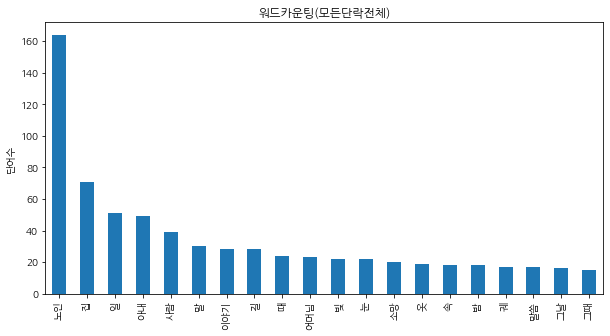

In [705]:
#워드 카운트
plt.figure(figsize=(10, 5))
plt.title("워드카운팅(모든단락전체)")
plt.ylabel("단어수")
data_text.explode('ExtractTags')['ExtractTags'].value_counts().sort_values(ascending=False).head(20).plot.bar();

In [708]:
data_text.loc[(data_text.line.str.contains(r"노인")), ["line", "quote"]]

,line,quote
2,노인과 아내가 동시에 밥숟가락을 멈추며 나의 얼굴을 멀거니 건너다본다,간접인용
4,노인은 결국 숟가락을 상위로 내려놓으며 믿기지 않는다는 듯 되묻고 있었다,간접인용
12,노인 대신 이번에는 아내 쪽에서 나를 원망스럽게 건너다보았다,간접인용
14,서울을 떠나올 때 급한 일들은 미리 다 처리해 둔 것을 그녀에게는 내가 말을 해 줬...,간접인용
17,한동안 입을 다물고 앉아 있던 노인이 마침내 체념을 한 듯 다시 입을 열었다,간접인용
...,...,...
223,한동안 조용히 입을 다물고 있던 아내가 이제 더 이상 참을 수가 없어진 듯 갑자기 ...,간접인용
224,나 역시도 이젠 더 이상 노인을 참을 수가 없었다 이제나마 노인을 가로막고 싶었다 ...,간접인용
225,나는 아직도 눈을 뜰 수가 없었다 불빛 아래 눈을 뜨고 일어날 수가 없었다 사지가 ...,간접인용
228,음성이 아직 흐트러지지 않고 있는 건 오히려 그 노인뿐이었다,간접인용


In [709]:
data_text.loc[(data_text.line.str.contains(r"노인"))&(data_text.quote != "간접인용"), ["line", "quote"]]

,line,quote
86,당신은 참 엉뚱한데서 독해요 늙은 노인네가 가엾지도 않으세요 말씀이라도 좀더 따뜻하...,직접인용


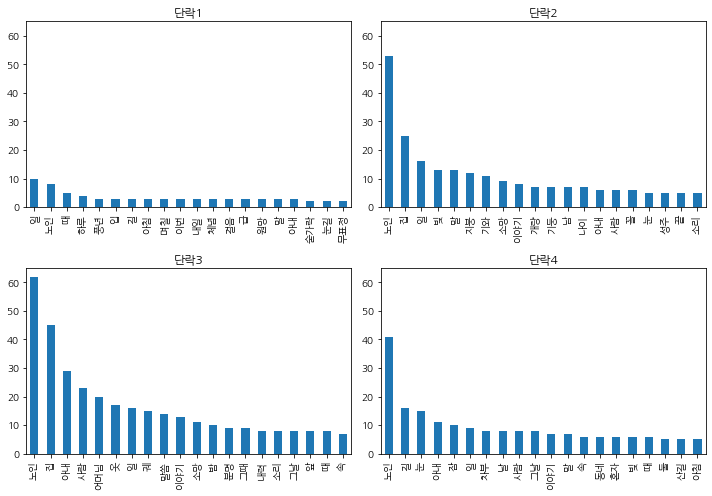

In [641]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7))

data_text[(data_text['paragraph'] == 1)].explode('ExtractTags')['ExtractTags'].\
    value_counts().sort_values(ascending=False).head(20).plot.bar(ax=axes[0, 0])
data_text[(data_text['paragraph'] == 2)].explode('ExtractTags')['ExtractTags'].\
    value_counts().sort_values(ascending=False).head(20).plot.bar(ax=axes[0, 1])
data_text[(data_text['paragraph'] == 3)].explode('ExtractTags')['ExtractTags'].\
    value_counts().sort_values(ascending=False).head(20).plot.bar(ax=axes[1, 0])
data_text[(data_text['paragraph'] == 4)].explode('ExtractTags')['ExtractTags'].\
    value_counts().sort_values(ascending=False).head(20).plot.bar(ax=axes[1, 1])

axes[0, 0].set_title("단락1")
axes[0, 1].set_title("단락2")
axes[1, 0].set_title("단락3")
axes[1, 1].set_title("단락4")

axes[0, 0].set_ylim(0, 65)
axes[0, 1].set_ylim(0, 65)
axes[1, 0].set_ylim(0, 65)
axes[1, 1].set_ylim(0, 65)

plt.tight_layout();

In [725]:
data_text.loc[(data_text['line'].str.contains(r"빚")), 'line'].head()

27      나는 금세 어디서 묵은 빚 문서라도 불쑥 불거져 나올 것 같은 조마조마한 기분이었다 
28    애초의 허물은 그 빌어먹을 비좁고 음습한 단칸 오두막 때문이었다 묵은 빚이 불거져 ...
45    나는 처음 그런 노인의 이야기를 들었을 때 무턱대고 가슴부터 덜렁 내려앉고 있었다 ...
69    일은 아직도 낙관할 수 없었다 나는 불시에 다시 그 노인에 대한 나의 빚만을 생각하...
75    나는 이제 할 말이 없었다 눈을 감은 채 듣고만 있었다 노인에 대해선 빚이 없음을 ...
Name: line, dtype: object

In [727]:
data_text.loc[(data_text['line'].str.contains(r"어머님")), 'line'].head()

107     그래도 어머님은 한 때 그런 좋은 집도 살아 보셨으니 추억은 즐거운 편이 아니시겠...
132     어머님은 아마 저 옷장에 그럴 만한 사연이 있으신가 보군요 시집 오실 때 해 오신...
137    하긴 어쨌거나 어머님 마음이 편하진 못하시겠어요 뭐니뭐니해도 옛날에 사시던 집을 지...
147    좋아요 어머님께선 아마 지난 이로 저까지 공연히 속을 상하게 할까 봐 그러시는 모양...
152    제가 알고 있는 건 그 집을 팔게 된 사정뿐만도 아니예요 어머님께서 저 사람한테 그...
Name: line, dtype: object

In [737]:
data_text.loc[(data_text.index == 219)&(data_text['line'].str.contains(r"눈"))&(data_text.paragraph == 4), 'line'].values

array([' 울기만 했겄냐 오목오목 디뎌 논 그 아그 발자국마다 한도 없는 눈물을 뿌리며 돌아왔제 내 자석아 내 자석아 부디 몸이나 성히 지내거라 부디부디 너라도 좋은 운 타서 복 받고 살거라 눈앞이 가리도록 눈물을 떨구면서 눈물로 저 아그 앞길만 빌고 왔제 '],
      dtype=object)

In [642]:
import seaborn as sns

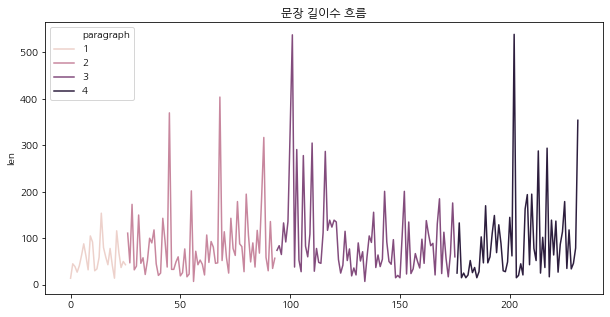

In [643]:
plt.figure(figsize=(10, 5))
g = sns.lineplot(data=data_text, x=data_text.index.to_list(), y='len', hue='paragraph')
g.set_title("문장 길이수 흐름");

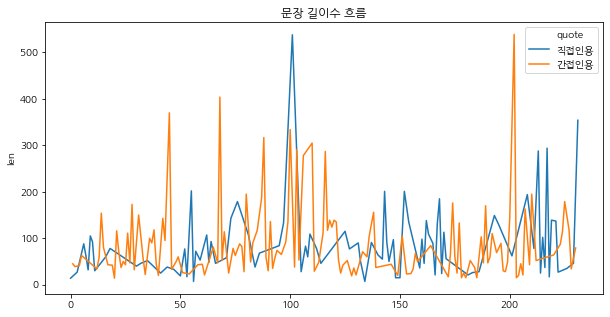

In [644]:
plt.figure(figsize=(10, 5))
g = sns.lineplot(data=data_text, x=data_text.index.to_list(), y='len', hue='quote')
g.set_title("문장 길이수 흐름");

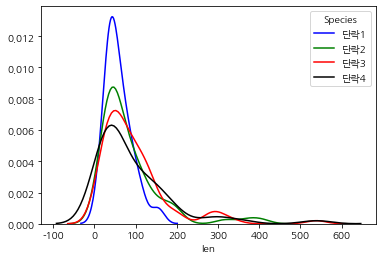

In [645]:
sns.distplot(data_text[data_text.paragraph == 1]['len'], color="blue", label="단락1", hist=False)
sns.distplot(data_text[data_text.paragraph == 2]['len'], color="green", label="단락2", hist=False)
sns.distplot(data_text[data_text.paragraph == 3]['len'], color="red", label="단락3", hist=False)
sns.distplot(data_text[data_text.paragraph == 4]['len'], color="black", label="단락4", hist=False)
plt.legend(title="Species")

## 인용별구분

In [646]:
data_text.groupby(['paragraph', 'quote']).size().reset_index()

,paragraph,quote,0
0,1,간접인용,16
1,1,직접인용,10
2,2,간접인용,45
3,2,직접인용,23
4,3,간접인용,45
5,3,직접인용,37
6,4,간접인용,36
7,4,직접인용,20


In [647]:
data_text.groupby(['paragraph', 'quote'])['len'].agg(['mean']).reset_index()

,paragraph,quote,mean
0,1,간접인용,58.062500
1,1,직접인용,58.800000
2,2,간접인용,93.488889
3,2,직접인용,68.173913
4,3,간접인용,95.200000
5,3,직접인용,96.243243
6,4,간접인용,84.222222
7,4,직접인용,109.400000


In [648]:
cond_narrator1 = (data_text.quote == '직접인용') 
cond_narrator2 = (data_text['original_line'].str.contains(r"([요오까][\.\?])|([니시]다\.)"))
cond_narrator3 = (data_text['original_line'].str.contains(r"(어머님)|(어머니)|(당신)|(여보)"))

C:\Users\HOME\anaconda3\lib\site-packages\pandas\core\strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [649]:
data_text['narrator'] = 'base'
data_text.loc[(cond_narrator1)&(~cond_narrator2), 'narrator'] = '직접인용_노인'
data_text.loc[(cond_narrator1)&(cond_narrator2)&(cond_narrator3), 'narrator'] = '직접인용_부인'
data_text.loc[(cond_narrator1)&(cond_narrator2)&(~cond_narrator3), 'narrator'] = '직접인용_아들'
data_text.loc[(data_text.quote == '간접인용'), 'narrator'] = '간접인용_아들'

In [738]:
data_text.groupby(['paragraph', 'quote', 'narrator'])['len'].agg(['mean', 'median', 'count']).reset_index().sort_values(['narrator', 'paragraph'])

,paragraph,quote,narrator,mean,median,count
0,1,간접인용,간접인용_아들,58.062500,44.0,16
3,2,간접인용,간접인용_아들,93.488889,60.0,45
7,3,간접인용,간접인용_아들,95.200000,65.0,45
11,4,간접인용,간접인용_아들,84.222222,52.0,36
1,1,직접인용,직접인용_노인,60.333333,61.0,6
4,2,직접인용,직접인용_노인,81.500000,65.0,16
8,3,직접인용,직접인용_노인,99.684211,64.0,19
12,4,직접인용,직접인용_노인,144.357143,133.0,14
5,2,직접인용,직접인용_부인,53.000000,53.0,2
9,3,직접인용,직접인용_부인,107.583333,97.5,12


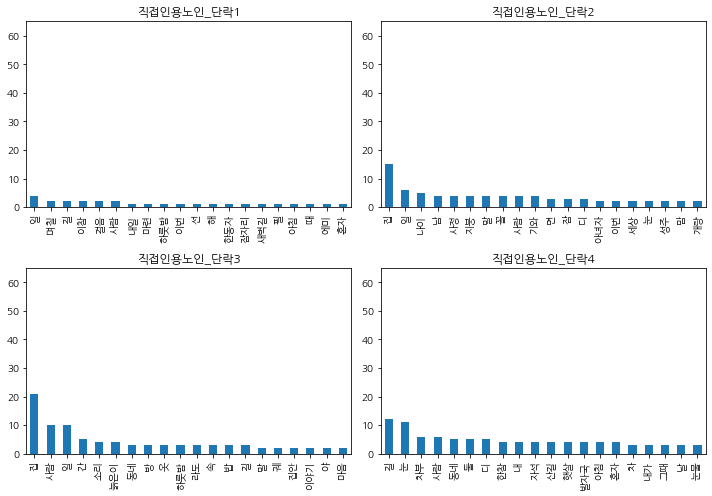

In [741]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7))

data_text[(data_text['paragraph'] == 1)&(data_text['narrator'] == '직접인용_노인')].explode('ExtractTags')['ExtractTags'].\
    value_counts().sort_values(ascending=False).head(20).plot.bar(ax=axes[0, 0])
data_text[(data_text['paragraph'] == 2)&(data_text['narrator'] == '직접인용_노인')].explode('ExtractTags')['ExtractTags'].\
    value_counts().sort_values(ascending=False).head(20).plot.bar(ax=axes[0, 1])
data_text[(data_text['paragraph'] == 3)&(data_text['narrator'] == '직접인용_노인')].explode('ExtractTags')['ExtractTags'].\
    value_counts().sort_values(ascending=False).head(20).plot.bar(ax=axes[1, 0])
data_text[(data_text['paragraph'] == 4)&(data_text['narrator'] == '직접인용_노인')].explode('ExtractTags')['ExtractTags'].\
    value_counts().sort_values(ascending=False).head(20).plot.bar(ax=axes[1, 1])

axes[0, 0].set_title("직접인용노인_단락1")
axes[0, 1].set_title("직접인용노인_단락2")
axes[1, 0].set_title("직접인용노인_단락3")
axes[1, 1].set_title("직접인용노인_단락4")

axes[0, 0].set_ylim(0, 65)
axes[0, 1].set_ylim(0, 65)
axes[1, 0].set_ylim(0, 65)
axes[1, 1].set_ylim(0, 65)

plt.tight_layout();

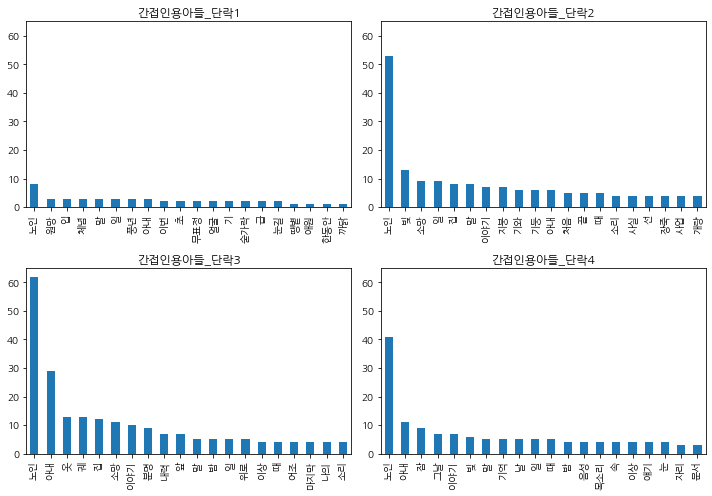

In [739]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7))

data_text[(data_text['paragraph'] == 1)&(data_text['narrator'] == '간접인용_아들')].explode('ExtractTags')['ExtractTags'].\
    value_counts().sort_values(ascending=False).head(20).plot.bar(ax=axes[0, 0])
data_text[(data_text['paragraph'] == 2)&(data_text['narrator'] == '간접인용_아들')].explode('ExtractTags')['ExtractTags'].\
    value_counts().sort_values(ascending=False).head(20).plot.bar(ax=axes[0, 1])
data_text[(data_text['paragraph'] == 3)&(data_text['narrator'] == '간접인용_아들')].explode('ExtractTags')['ExtractTags'].\
    value_counts().sort_values(ascending=False).head(20).plot.bar(ax=axes[1, 0])
data_text[(data_text['paragraph'] == 4)&(data_text['narrator'] == '간접인용_아들')].explode('ExtractTags')['ExtractTags'].\
    value_counts().sort_values(ascending=False).head(20).plot.bar(ax=axes[1, 1])

axes[0, 0].set_title("간접인용아들_단락1")
axes[0, 1].set_title("간접인용아들_단락2")
axes[1, 0].set_title("간접인용아들_단락3")
axes[1, 1].set_title("간접인용아들_단락4")

axes[0, 0].set_ylim(0, 65)
axes[0, 1].set_ylim(0, 65)
axes[1, 0].set_ylim(0, 65)
axes[1, 1].set_ylim(0, 65)

plt.tight_layout();

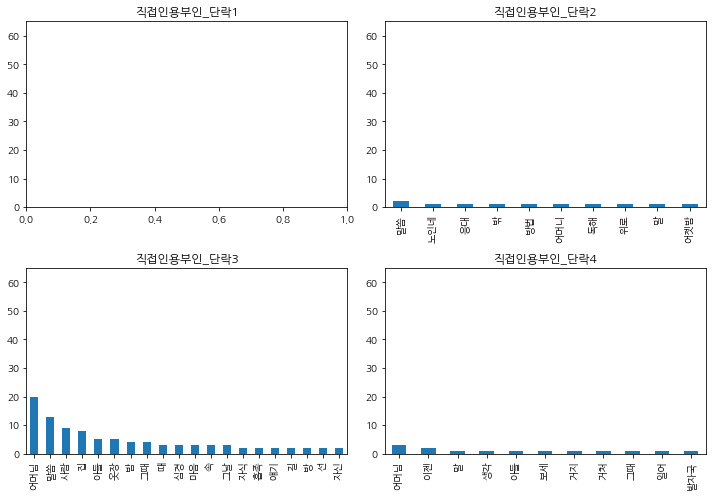

In [740]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7))

data_text[(data_text['paragraph'] == 2)&(data_text['narrator'] == '직접인용_부인')].explode('ExtractTags')['ExtractTags'].\
    value_counts().sort_values(ascending=False).head(20).plot.bar(ax=axes[0, 1])
data_text[(data_text['paragraph'] == 3)&(data_text['narrator'] == '직접인용_부인')].explode('ExtractTags')['ExtractTags'].\
    value_counts().sort_values(ascending=False).head(20).plot.bar(ax=axes[1, 0])
data_text[(data_text['paragraph'] == 4)&(data_text['narrator'] == '직접인용_부인')].explode('ExtractTags')['ExtractTags'].\
    value_counts().sort_values(ascending=False).head(20).plot.bar(ax=axes[1, 1])

axes[0, 0].set_title("직접인용부인_단락1")
axes[0, 1].set_title("직접인용부인_단락2")
axes[1, 0].set_title("직접인용부인_단락3")
axes[1, 1].set_title("직접인용부인_단락4")

axes[0, 0].set_ylim(0, 65)
axes[0, 1].set_ylim(0, 65)
axes[1, 0].set_ylim(0, 65)
axes[1, 1].set_ylim(0, 65)

plt.tight_layout();

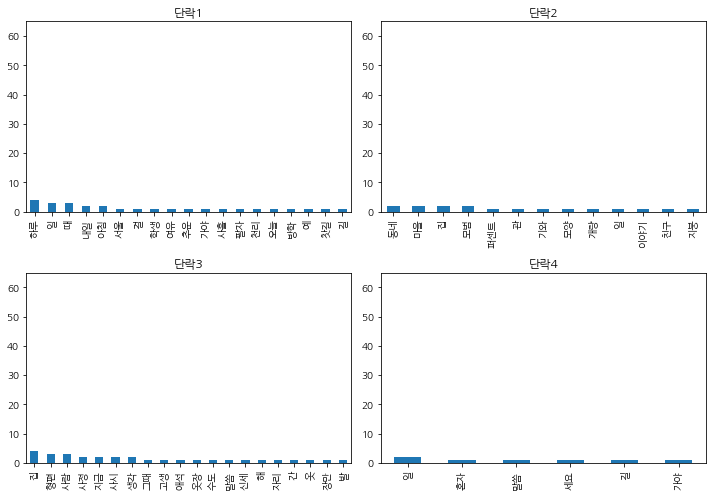

In [654]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7))

data_text[(data_text['paragraph'] == 1)&(data_text['narrator'] == '직접인용_아들')].explode('ExtractTags')['ExtractTags'].\
    value_counts().sort_values(ascending=False).head(20).plot.bar(ax=axes[0, 0])
data_text[(data_text['paragraph'] == 2)&(data_text['narrator'] == '직접인용_아들')].explode('ExtractTags')['ExtractTags'].\
    value_counts().sort_values(ascending=False).head(20).plot.bar(ax=axes[0, 1])
data_text[(data_text['paragraph'] == 3)&(data_text['narrator'] == '직접인용_아들')].explode('ExtractTags')['ExtractTags'].\
    value_counts().sort_values(ascending=False).head(20).plot.bar(ax=axes[1, 0])
data_text[(data_text['paragraph'] == 4)&(data_text['narrator'] == '직접인용_아들')].explode('ExtractTags')['ExtractTags'].\
    value_counts().sort_values(ascending=False).head(20).plot.bar(ax=axes[1, 1])

axes[0, 0].set_title("단락1")
axes[0, 1].set_title("단락2")
axes[1, 0].set_title("단락3")
axes[1, 1].set_title("단락4")

axes[0, 0].set_ylim(0, 65)
axes[0, 1].set_ylim(0, 65)
axes[1, 0].set_ylim(0, 65)
axes[1, 1].set_ylim(0, 65)

plt.tight_layout();

## 문장 길이

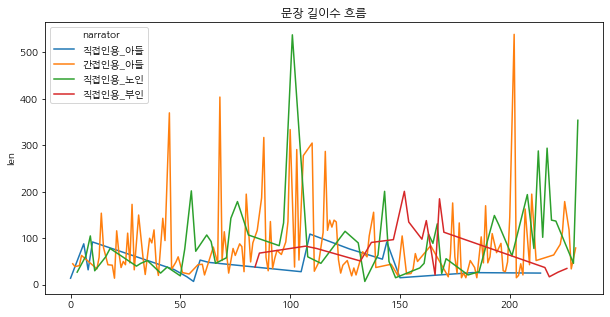

In [655]:
plt.figure(figsize=(10, 5))
g = sns.lineplot(data=data_text, x=data_text.index.to_list(), y='len', hue='narrator')
g.set_title("문장 길이수 흐름");

## 표현의 다양성

In [656]:
data_text.head()

,line,original_line,paragraph,quote,len,tag_list,ExtractTags,narrator
0,내일 아침 올라가야겠어요,“내일 아침 올라가야겠어요.”\n,1,직접인용,14,"[(내일, NNG), (아침, NNG), (올르, VV), (아, ECS), (가야...","[내일, 아침, 가야]",직접인용_아들
1,점심상을 물러나 앉으면서 나는 마침내 입 속에서 별러 오던 소리를 내뱉어 버렸다,점심상을 물러나 앉으면서 나는 마침내 입 속에서 별러 오던 소리를 내뱉어 버렸다. \n,1,간접인용,45,"[(점심상, NNG), (을, JKO), (물러나, VV), (앉으면서, UN), ...","[점심상, 입, 속, 소리]",간접인용_아들
2,노인과 아내가 동시에 밥숟가락을 멈추며 나의 얼굴을 멀거니 건너다본다,노인과 아내가 동시에 밥숟가락을 멈추며 나의 얼굴을 멀거니 건너다본다. \n,1,간접인용,39,"[(노인, NNG), (과, JC), (아내, NNG), (가, JKS), (동시,...","[노인, 아내, 동시, 밥, 숟가락, 얼굴]",간접인용_아들
3,내일 아침 올라가다니 이참에도 또 그렇게 쉽게,“내일 아침 올라가다니. 이참에도 또 그렇게 쉽게?” \n,1,직접인용,27,"[(내일, NNG), (아침, NNG), (올르, VV), (아, ECS), (가닿...","[내일, 아침, 이참]",직접인용_노인
4,노인은 결국 숟가락을 상위로 내려놓으며 믿기지 않는다는 듯 되묻고 있었다,노인은 결국 숟가락을 상위로 내려놓으며 믿기지 않는다는 듯 되묻고 있었다. \n,1,간접인용,41,"[(노인, NNG), (은, JX), (결국, NNG), (숟가락, NNG), (을...","[노인, 결국, 숟가락, 상위]",간접인용_아들


In [660]:
data_text['cnt_word'] =  data_text['ExtractTags'].map(lambda x : len(set(x)))

In [661]:
data_text.groupby(['narrator', 'paragraph']).agg({"len":["sum", "mean"], "cnt_word":["sum", "mean"]}).reset_index()

narrator paragraph   len             cnt_word           
                        sum        mean      sum       mean
0   간접인용_아들         1   929   58.062500       99   6.187500
1   간접인용_아들         2  4207   93.488889      423   9.400000
2   간접인용_아들         3  4284   95.200000      428   9.511111
3   간접인용_아들         4  3032   84.222222      283   7.861111
4   직접인용_노인         1   362   60.333333       27   4.500000
5   직접인용_노인         2  1304   81.500000      137   8.562500
6   직접인용_노인         3  1894   99.684211      174   9.157895
7   직접인용_노인         4  2021  144.357143      179  12.785714
8   직접인용_부인         2   106   53.000000       11   5.500000
9   직접인용_부인         3  1291  107.583333      106   8.833333
10  직접인용_부인         4   116   29.000000       14   3.500000
11  직접인용_아들         1   226   56.500000       23   5.750000
12  직접인용_아들         2   158   31.600000       17   3.400000
13  직접인용_아들         3   376   62.666667       37   6.166667
14  직접인용_아들         4    51   25.500000        7   3.500000

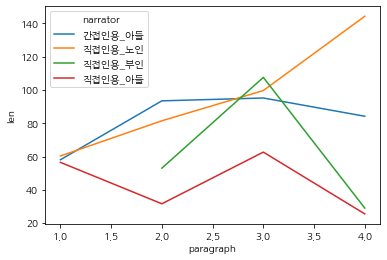

In [744]:
len_narrator = data_text.groupby(['narrator', 'paragraph'])['len'].mean().reset_index()
sns.lineplot(data=len_narrator, x='paragraph', y='len', hue='narrator')

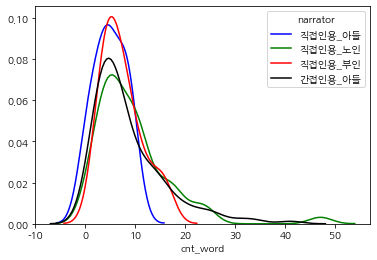

In [594]:
sns.distplot(data_text[data_text.narrator == '직접인용_아들']['cnt_word'], color="blue", label="직접인용_아들", hist=False)
sns.distplot(data_text[data_text.narrator == '직접인용_노인']['cnt_word'], color="green", label="직접인용_노인", hist=False)
sns.distplot(data_text[data_text.narrator == '직접인용_부인']['cnt_word'], color="red", label="직접인용_부인", hist=False)
sns.distplot(data_text[data_text.narrator == '간접인용_아들']['cnt_word'], color="black", label="간접인용_아들", hist=False)
plt.legend(title="narrator")

(0.0, 0.5)

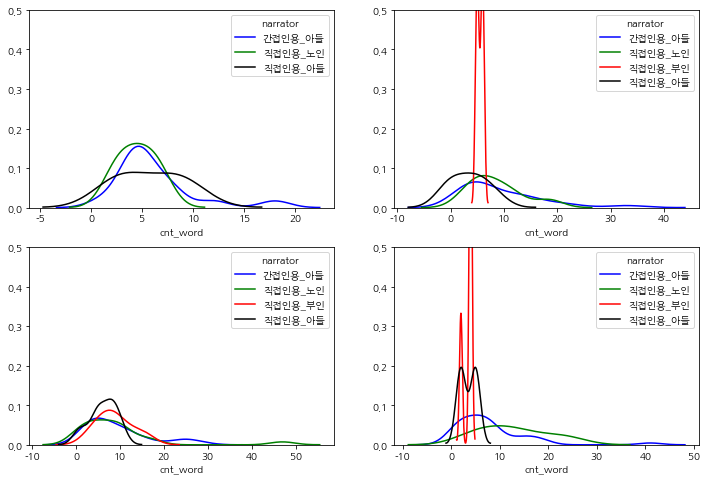

In [745]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

sns.distplot(data_text[(data_text.narrator == '간접인용_아들')&(data_text['paragraph'] == 1)]['cnt_word']
             , color="blue", label="간접인용_아들", hist=False, ax=axes[0, 0])
sns.distplot(data_text[(data_text.narrator == '직접인용_노인')&(data_text['paragraph'] == 1)]['cnt_word']
             , color="green", label="직접인용_노인", hist=False, ax=axes[0, 0])
sns.distplot(data_text[(data_text.narrator == '직접인용_부인')&(data_text['paragraph'] == 1)]['cnt_word']
             , color="red", label="직접인용_부인", hist=False, ax=axes[0, 0])
sns.distplot(data_text[(data_text.narrator == '직접인용_아들')&(data_text['paragraph'] == 1)]['cnt_word']
             , color="black", label="직접인용_아들", hist=False, ax=axes[0, 0])
axes[0, 0].legend(title="narrator")

sns.distplot(data_text[(data_text.narrator == '간접인용_아들')&(data_text['paragraph'] == 2)]['cnt_word']
             , color="blue", label="간접인용_아들", hist=False, ax=axes[0, 1])
sns.distplot(data_text[(data_text.narrator == '직접인용_노인')&(data_text['paragraph'] == 2)]['cnt_word']
             , color="green", label="직접인용_노인", hist=False, ax=axes[0, 1])
sns.distplot(data_text[(data_text.narrator == '직접인용_부인')&(data_text['paragraph'] == 2)]['cnt_word']
             , color="red", label="직접인용_부인", hist=False, ax=axes[0, 1])
sns.distplot(data_text[(data_text.narrator == '직접인용_아들')&(data_text['paragraph'] == 2)]['cnt_word']
             , color="black", label="직접인용_아들", hist=False, ax=axes[0, 1])
axes[0, 1].legend(title="narrator")

sns.distplot(data_text[(data_text.narrator == '간접인용_아들')&(data_text['paragraph'] == 3)]['cnt_word']
             , color="blue", label="간접인용_아들", hist=False, ax=axes[1, 0])
sns.distplot(data_text[(data_text.narrator == '직접인용_노인')&(data_text['paragraph'] == 3)]['cnt_word']
             , color="green", label="직접인용_노인", hist=False, ax=axes[1, 0])
sns.distplot(data_text[(data_text.narrator == '직접인용_부인')&(data_text['paragraph'] == 3)]['cnt_word']
             , color="red", label="직접인용_부인", hist=False, ax=axes[1, 0])
sns.distplot(data_text[(data_text.narrator == '직접인용_아들')&(data_text['paragraph'] == 3)]['cnt_word']
             , color="black", label="직접인용_아들", hist=False, ax=axes[1, 0])
axes[1, 0].legend(title="narrator")

sns.distplot(data_text[(data_text.narrator == '간접인용_아들')&(data_text['paragraph'] == 4)]['cnt_word']
             , color="blue", label="간접인용_아들", hist=False, ax=axes[1, 1])
sns.distplot(data_text[(data_text.narrator == '직접인용_노인')&(data_text['paragraph'] == 4)]['cnt_word']
             , color="green", label="직접인용_노인", hist=False, ax=axes[1, 1])
sns.distplot(data_text[(data_text.narrator == '직접인용_부인')&(data_text['paragraph'] == 4)]['cnt_word']
             , color="red", label="직접인용_부인", hist=False, ax=axes[1, 1])
sns.distplot(data_text[(data_text.narrator == '직접인용_아들')&(data_text['paragraph'] == 4)]['cnt_word']
             , color="black", label="직접인용_아들", hist=False, ax=axes[1, 1])
axes[1, 1].legend(title="narrator")
axes[0, 0].set_ylim(0, 0.5)
axes[0, 1].set_ylim(0, 0.5)
axes[1, 0].set_ylim(0, 0.5)
axes[1, 1].set_ylim(0, 0.5)

## 노인이라는 단어가 등장하는 간격 빈도

In [668]:
data_text.index.values

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [686]:
data_text['interval'] = '노인X'
data_text.loc[(data_text['line'].str.contains(r"노인")), "interval"] = '노인O'
data_text['interval_value'] = 1

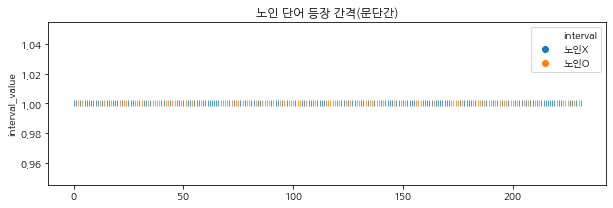

In [722]:
plt.figure(figsize=(10, 3))
plt.title("노인 단어 등장 간격(문단간)")
sns.scatterplot(data=data_text, x=data_text.index.values, y='interval_value', hue='interval', marker="|");

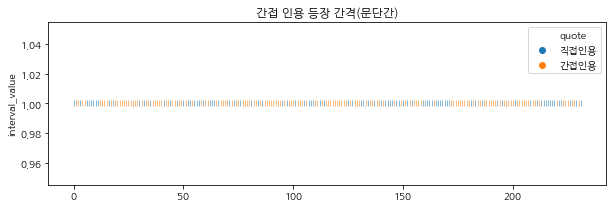

In [723]:
plt.figure(figsize=(10, 3))
plt.title("간접 인용 등장 간격(문단간)")
sns.scatterplot(data=data_text, x=data_text.index.values, y='interval_value', hue='quote', alpha=0.7, marker="|");

In [724]:
data_text.groupby("quote").size()

quote
간접인용    142
직접인용     90
dtype: int64